In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

# Load and prepare data
df = pd.read_csv('../data/ADHD LMS Evaluation dataset.csv')
# Clean column names
df.columns = df.columns.str.strip() 

In [4]:
# Preview data
print(df.head())
print("\nData shape:", df.shape)

  Participant ID  Gender  ADHD Severity Score     ADHD Level  \
0           AD01  Female                   15   Low positive   
1           AD02    Male                   13  High negative   
2           AD03  Female                    9   Low negative   
3           AD04    Male                   15   Low positive   
4           AD05    Male                   17   Low positive   

   Base LMS_Quiz score  Base LMS_SUS score  Base LMS_UEQ_Attractiveness  \
0                    5                55.0                         3.83   
1                    5                32.5                         3.33   
2                    5                57.5                         4.17   
3                    5                87.5                         3.83   
4                    9                55.0                         3.17   

   Base LMS_UEQ_Perspicuity  Base LMS_UEQ_Novelty  Base LMS_UEQ_Stimulation  \
0                      4.25                  3.50                      4.50   
1     

In [5]:
# SUS Scores
print("SUS Scores Descriptive Statistics:")
print(df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']].describe())

SUS Scores Descriptive Statistics:
       Base LMS_SUS score  Manual LMS_SUS score  AI LMS_SUS score
count           22.000000             22.000000         22.000000
mean            57.954545             73.750000         80.113636
std             23.345699             17.589059         17.156098
min             20.000000             42.500000         45.000000
25%             35.000000             65.625000         68.125000
50%             56.250000             75.000000         83.750000
75%             78.750000             90.000000         92.500000
max             97.500000             97.500000        100.000000


In [6]:
# Create composite UEQ scores
ueq_dims = ['Attractiveness', 'Perspicuity', 'Novelty', 'Stimulation', 'Dependability', 'Efficiency']
for lms in ['Base', 'Manual', 'AI']:
    ueq_cols = [f'{lms} LMS_UEQ_{dim}' for dim in ueq_dims]
    df[f'{lms}_LMS_UEQ'] = df[ueq_cols].mean(axis=1)

In [7]:
# UEQ Scores (mean of all dimensions)
print("\nUEQ Scores Descriptive Statistics:")
print(df[['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ']].describe())


UEQ Scores Descriptive Statistics:
       Base_LMS_UEQ  Manual_LMS_UEQ  AI_LMS_UEQ
count     22.000000       22.000000   22.000000
mean       3.897803        3.919848    4.007652
std        0.359239        0.186970    0.290006
min        3.125000        3.570000    3.653333
25%        3.836667        3.836667    3.850417
50%        3.937500        3.903333    3.972500
75%        4.038333        4.038333    4.065833
max        4.666667        4.195000    4.820000


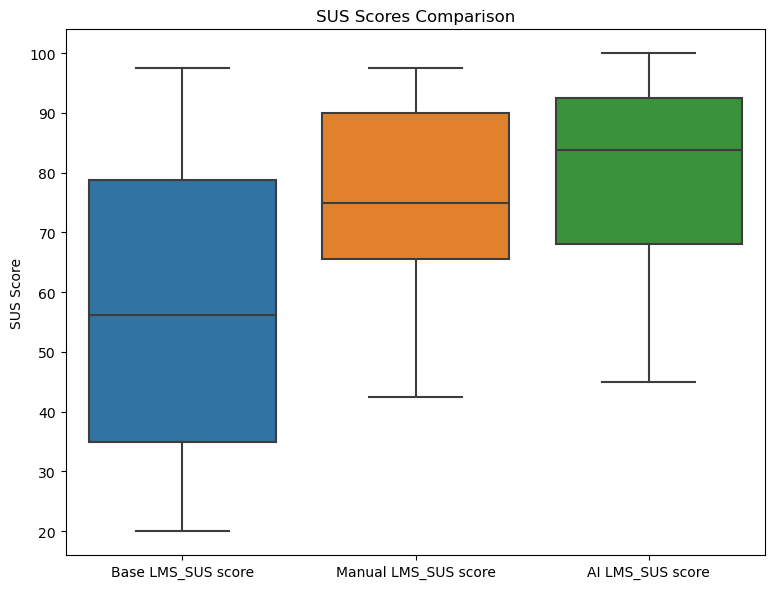

In [7]:
#SUS comparisons boxplot

plt.figure(figsize=(15,6))

# SUS Scores
plt.subplot(1,2,1)
sns.boxplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']])
plt.title('SUS Scores Comparison')
plt.ylabel('SUS Score')

plt.tight_layout()
plt.show()

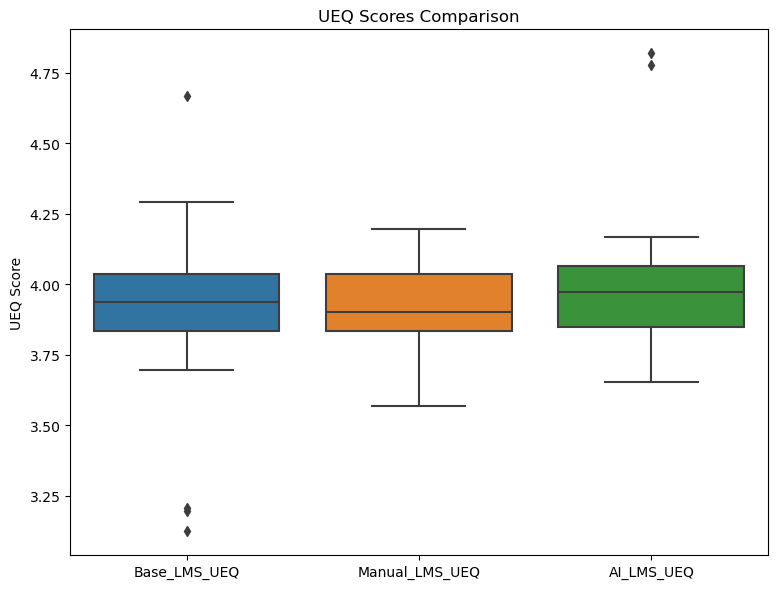

In [8]:
#UEQ comparisons boxplot

plt.figure(figsize=(15,6))

# UEQ Scores
plt.subplot(1,2,2)
sns.boxplot(data=df[['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ']])
plt.title('UEQ Scores Comparison')
plt.ylabel('UEQ Score')

plt.tight_layout()
plt.show()

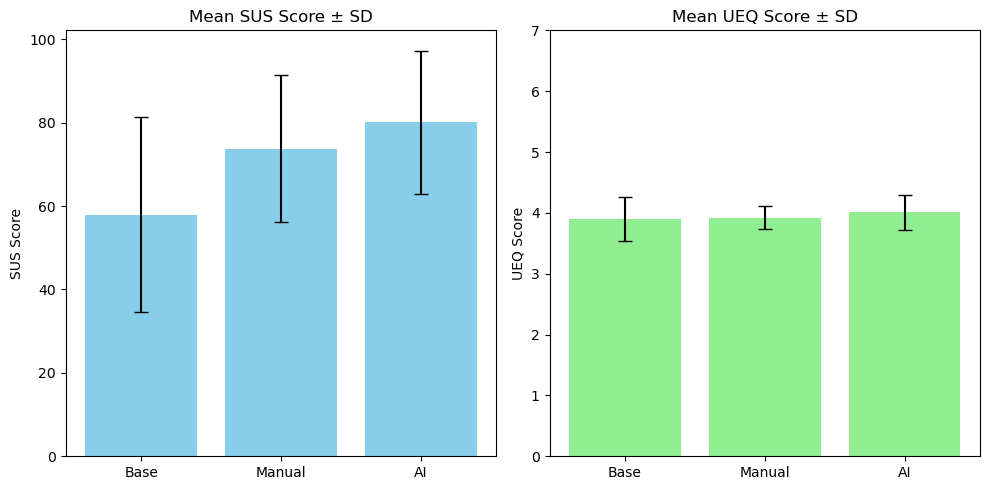

In [11]:
#SUS & UEQ - means, std analysis

plt.figure(figsize=(10, 5))

# SUS Means and Std
sus_means = df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']].mean()
sus_stds = df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']].std()

plt.subplot(1, 2, 1)
plt.bar(sus_means.index, sus_means, yerr=sus_stds, capsize=5, color='skyblue')
plt.title('Mean SUS Score ± SD')
plt.ylabel('SUS Score')
plt.xticks(ticks=[0, 1, 2], labels=['Base', 'Manual', 'AI'])

# UEQ
ueq_means = df[['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ']].mean()
ueq_stds = df[['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ']].std()

plt.subplot(1, 2, 2)
plt.bar(ueq_means.index, ueq_means, yerr=ueq_stds, capsize=5, color='lightgreen')
plt.title('Mean UEQ Score ± SD')
plt.ylabel('UEQ Score')
plt.ylim(0, 7)
plt.xticks(ticks=[0, 1, 2], labels=['Base', 'Manual', 'AI'])

plt.tight_layout()
plt.show()


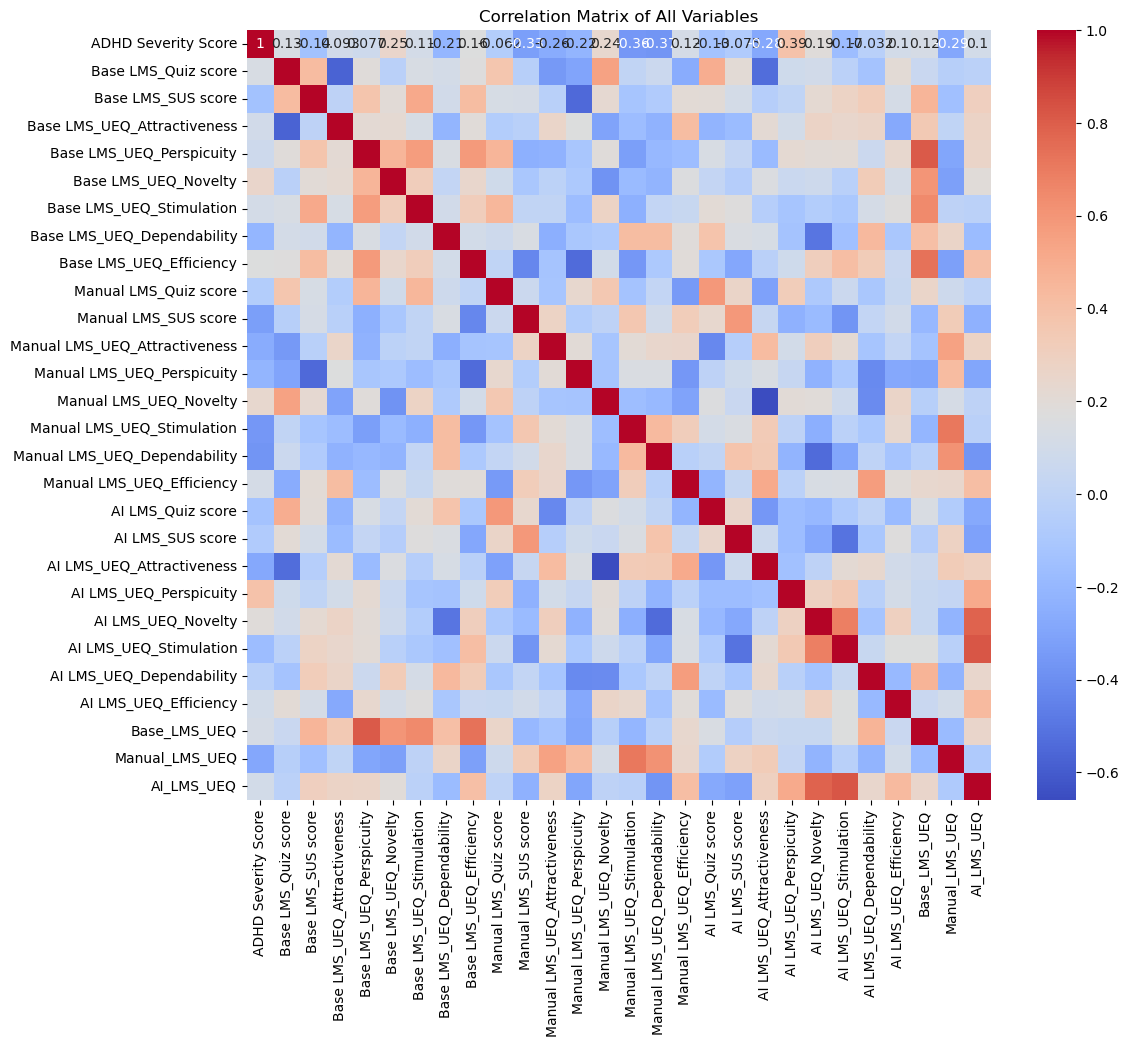

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of All Variables')
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

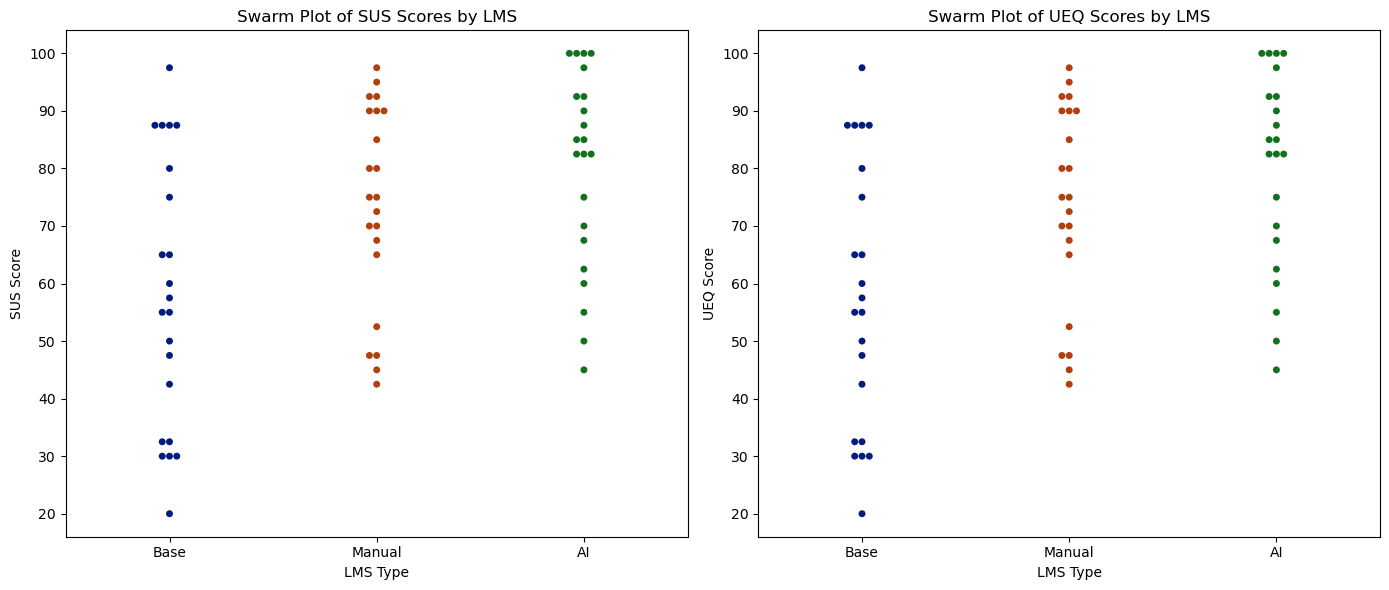

In [13]:
#SUS & UEQ comparions - swarm plot 

plt.figure(figsize=(14, 6))

# SUS Scores
plt.subplot(1, 2, 1)
sns.swarmplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']], palette="dark")
plt.title('Swarm Plot of SUS Scores by LMS')
plt.ylabel('SUS Score')
plt.xlabel('LMS Type')
plt.xticks(ticks=[0, 1, 2], labels=['Base', 'Manual', 'AI'])

# UEQ Scores
plt.subplot(1, 2, 2)
sns.swarmplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']], palette="dark")
plt.title('Swarm Plot of UEQ Scores by LMS')
plt.ylabel('UEQ Score')
plt.xlabel('LMS Type')
plt.xticks(ticks=[0, 1, 2], labels=['Base', 'Manual', 'AI'])

plt.tight_layout()
plt.show()

C:\Users\Omic PC\AppData\Local\Temp\ipykernel_13764\3197005250.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']], ci=95, capsize=0.1, palette="muted")
C:\Users\Omic PC\AppData\Local\Temp\ipykernel_13764\3197005250.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']], ci=95, capsize=0.1, palette="muted")


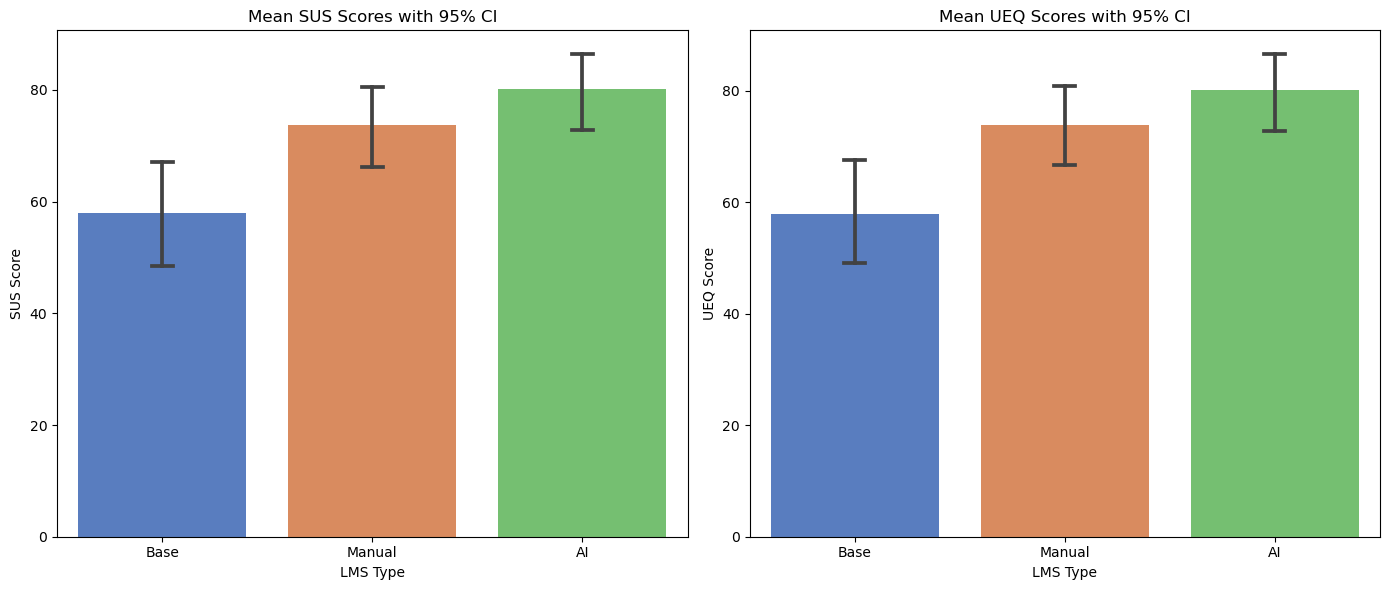

In [14]:
#SUS & UEQ - mean scores with 95% CI

plt.figure(figsize=(14, 6))

# SUS Scores
plt.subplot(1, 2, 1)
sns.barplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']], ci=95, capsize=0.1, palette="muted")
plt.title('Mean SUS Scores with 95% CI')
plt.ylabel('SUS Score')
plt.xlabel('LMS Type')
plt.xticks(ticks=[0, 1, 2], labels=['Base', 'Manual', 'AI'])

# UEQ Scores
plt.subplot(1, 2, 2)
sns.barplot(data=df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']], ci=95, capsize=0.1, palette="muted")
plt.title('Mean UEQ Scores with 95% CI')
plt.ylabel('UEQ Score')
plt.xlabel('LMS Type')
plt.xticks(ticks=[0, 1, 2], labels=['Base', 'Manual', 'AI'])

plt.tight_layout()
plt.show()

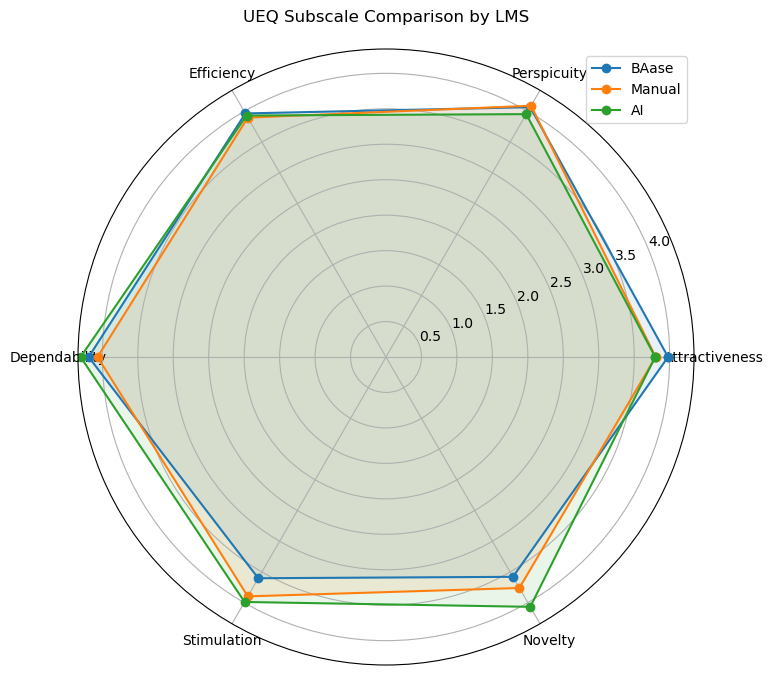

In [15]:
#UEQ subscale comparison by LMS

import numpy as np

# Calculate mean UEQ subscale scores for each LMS
ueq_dims = ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']
ueq_means = {
    'BAase': [df[f'Base LMS_UEQ_{dim}'].mean() for dim in ueq_dims],
    'Manual': [df[f'Manual LMS_UEQ_{dim}'].mean() for dim in ueq_dims],
    'AI': [df[f'AI LMS_UEQ_{dim}'].mean() for dim in ueq_dims]
}

# Plot radar chart
angles = np.linspace(0, 2 * np.pi, len(ueq_dims), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
for lms, scores in ueq_means.items():
    scores += scores[:1]  # Close the loop
    ax.plot(angles, scores, 'o-', label=lms)
    ax.fill(angles, scores, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(ueq_dims)
ax.set_title('UEQ Subscale Comparison by LMS', pad=20)
ax.legend(loc='upper right')
plt.show()

In [16]:
#Normality Testing (Shapiro-Wilk)

print("\nNormality Tests (Shapiro-Wilk):")
normality_results = []

for lms in ['Base', 'Manual', 'AI']:
    # SUS Scores
    stat, p = stats.shapiro(df[f'{lms} LMS_SUS score'])
    normality_results.append({'Measure': 'SUS', 'LMS': lms, 'W': stat, 'p-value': p, 'Normality': 'Normal' if p >= 0.05 else 'Non-normal'})
    print(f"{lms} SUS: W={stat:.3f}, p={p:.4f} → {'Normal' if p >= 0.05 else 'Non-normal'}")
    
    # UEQ Scores
    stat, p = stats.shapiro(df[f'{lms}_LMS_UEQ'])
    normality_results.append({'Measure': 'UEQ', 'LMS': lms, 'W': stat, 'p-value': p, 'Normality': 'Normal' if p >= 0.05 else 'Non-normal'})
    print(f"{lms} UEQ: W={stat:.3f}, p={p:.4f} → {'Normal' if p >= 0.05 else 'Non-normal'}")

# Convert to DataFrame for better visualization
normality_df = pd.DataFrame(normality_results)
print("\nNormality Test Summary:")
print(normality_df)


Normality Tests (Shapiro-Wilk):
Base SUS: W=0.939, p=0.1855 → Normal
Base UEQ: W=0.903, p=0.0342 → Non-normal
Manual SUS: W=0.916, p=0.0641 → Normal
Manual UEQ: W=0.953, p=0.3623 → Normal
AI SUS: W=0.915, p=0.0598 → Normal
AI UEQ: W=0.778, p=0.0002 → Non-normal

Normality Test Summary:
  Measure     LMS         W   p-value   Normality
0     SUS    Base  0.938631  0.185452      Normal
1     UEQ    Base  0.903014  0.034168  Non-normal
2     SUS  Manual  0.916413  0.064091      Normal
3     UEQ  Manual  0.953035  0.362282      Normal
4     SUS      AI  0.914943  0.059774      Normal
5     UEQ      AI  0.778409  0.000234  Non-normal


C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


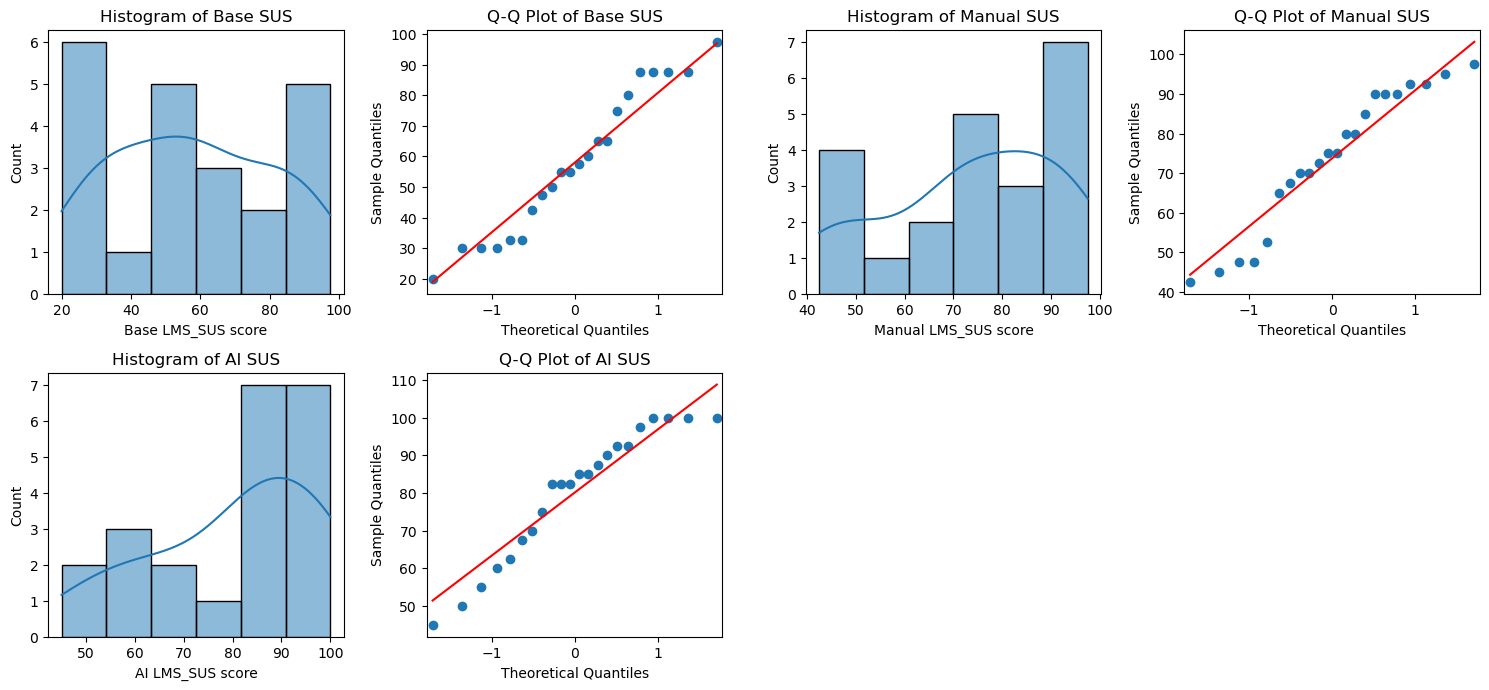

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


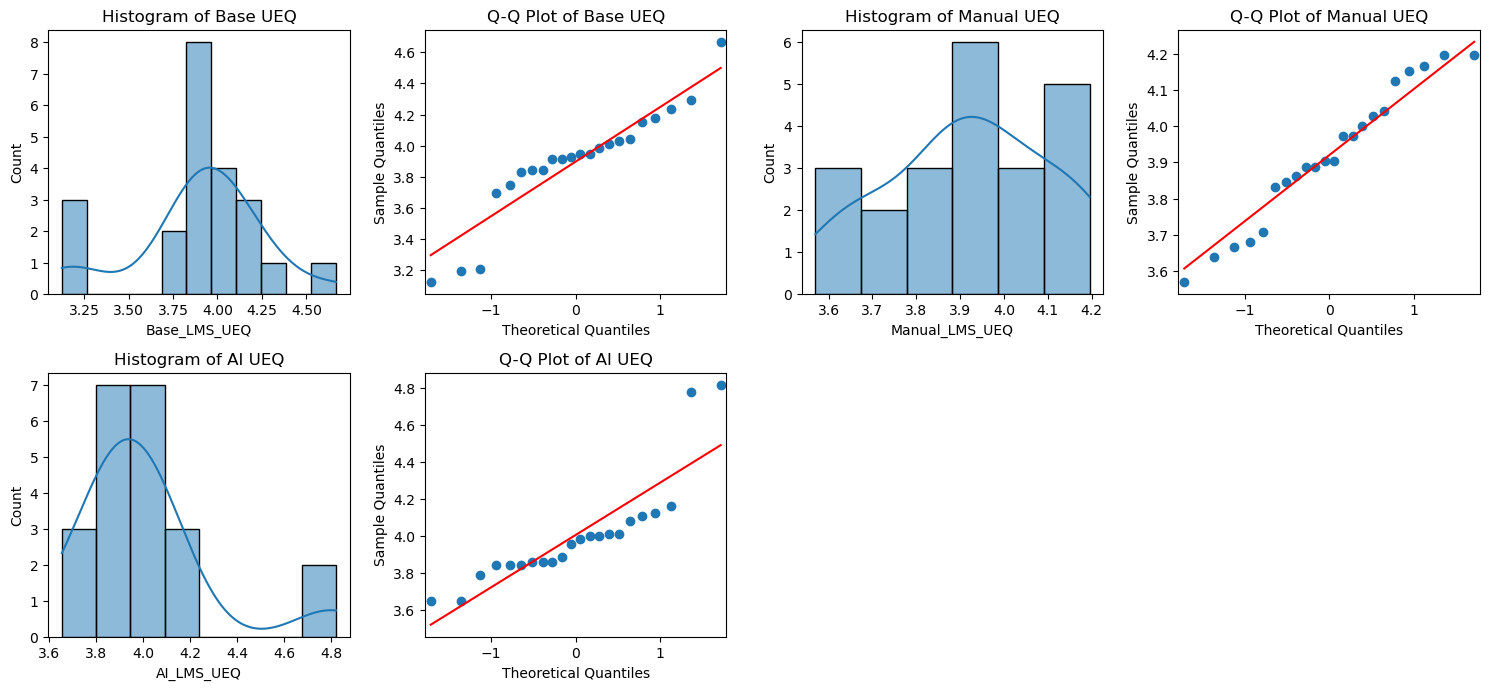

In [17]:
#Visualization: Histograms and Q-Q Plots for Normality Check

def plot_normality_checks(data, columns, titles):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        # Histogram
        plt.subplot(3, 4, 2*i+1)
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {titles[i]}')
        
        # Q-Q plot
        plt.subplot(3, 4, 2*i+2)
        sm.qqplot(data[col], line='s', ax=plt.gca())
        plt.title(f'Q-Q Plot of {titles[i]}')
    
    plt.tight_layout()
    plt.show()

# Plot for SUS scores
plot_normality_checks(df, ['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score'], 
                     ['Base SUS', 'Manual SUS', 'AI SUS'])

# Plot for UEQ scores
plot_normality_checks(df, ['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ'], 
                     ['Base UEQ', 'Manual UEQ', 'AI UEQ'])


Normality Checks for SUS Scores:


C:\Program Files\Anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


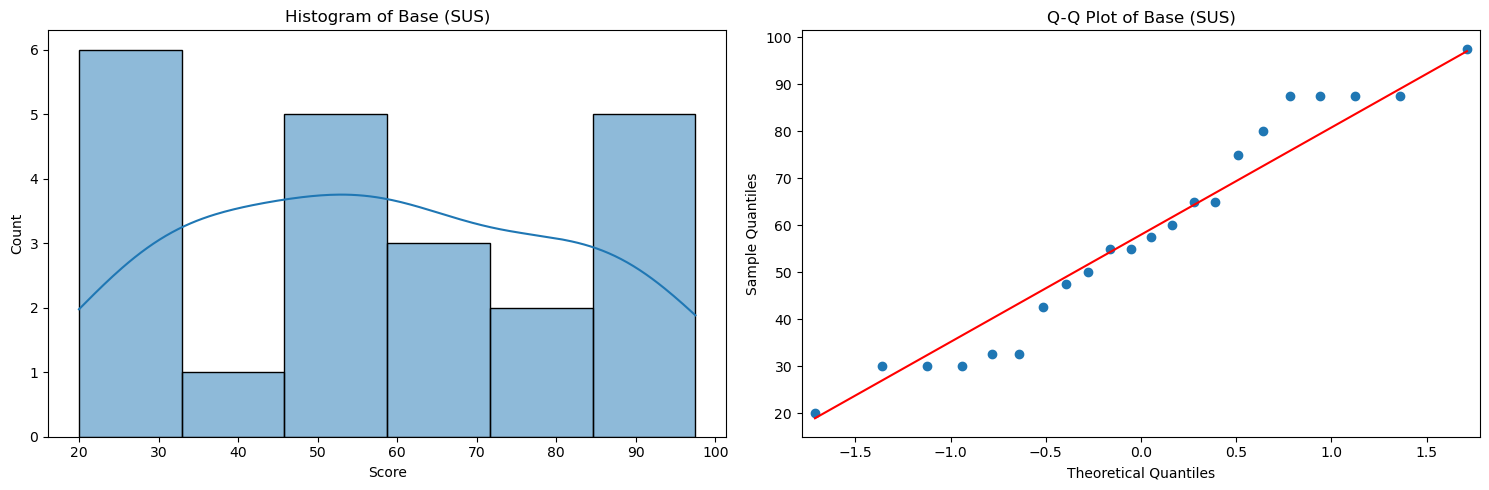

C:\Program Files\Anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


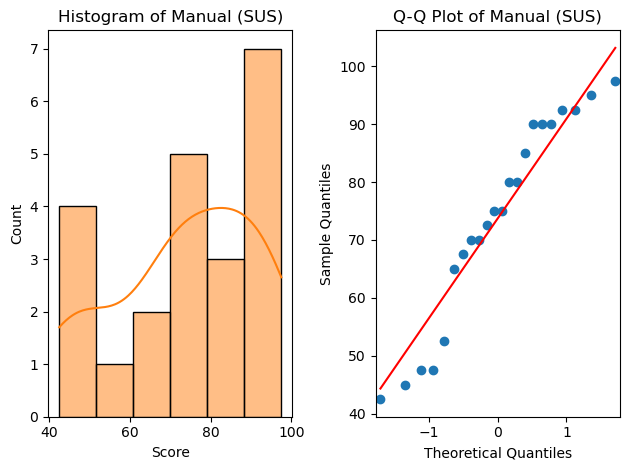

C:\Program Files\Anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


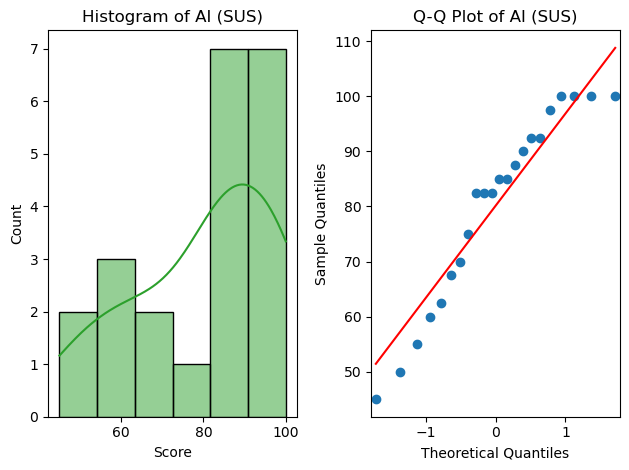


Normality Checks for UEQ Scores:


C:\Program Files\Anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


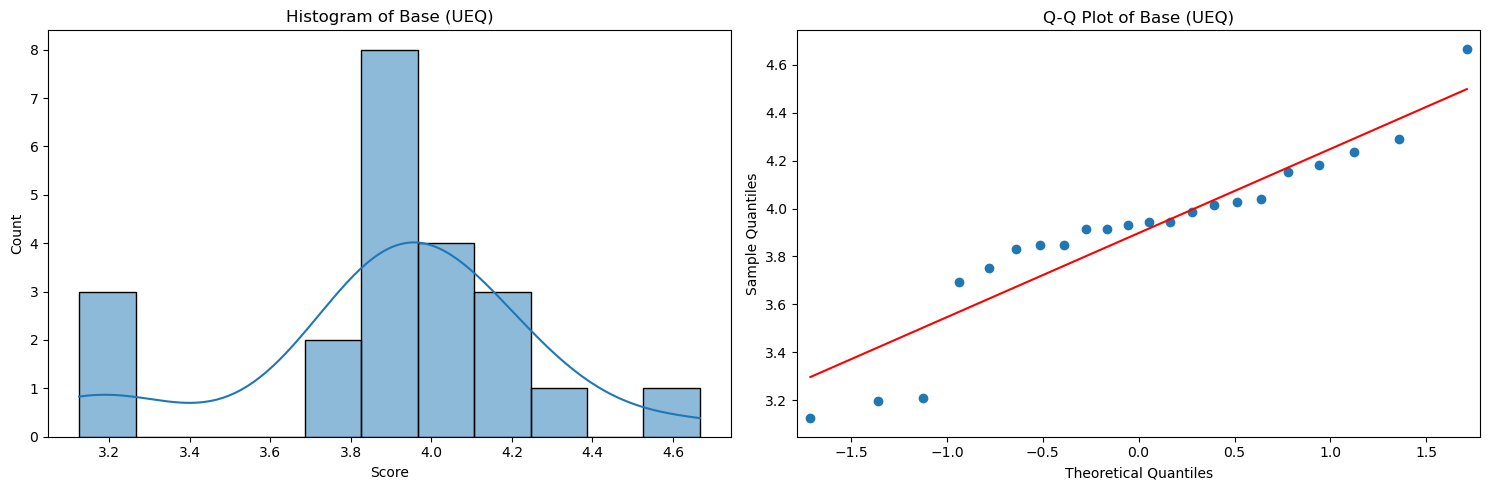

C:\Program Files\Anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


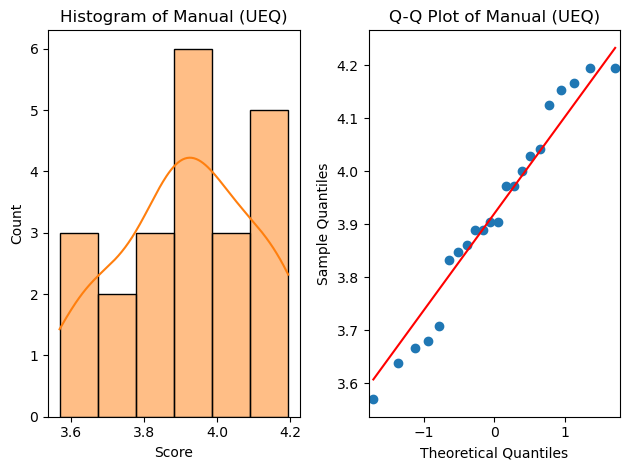

C:\Program Files\Anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


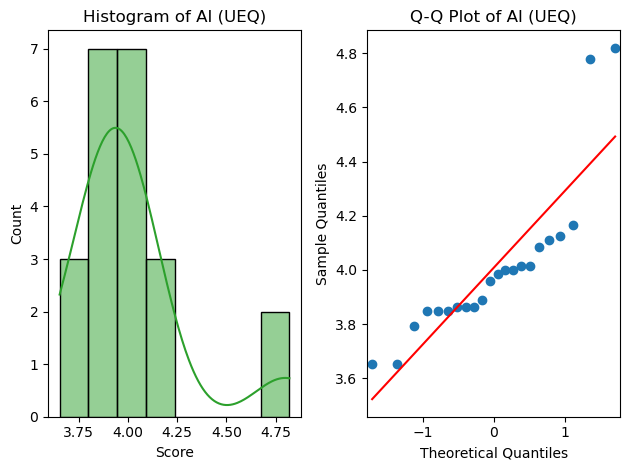

In [18]:
#Visualization(extra): Histograms and Q-Q Plots for Normality Check

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Suppress FutureWarnings about use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning)

def plot_normality_checks(data, columns, titles, measure_name):
    """Plot histograms and Q-Q plots for normality checking"""
    plt.figure(figsize=(15, 5))
    
    for i, col in enumerate(columns):
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, color=f'C{i}')
        plt.title(f'Histogram of {titles[i]} ({measure_name})')
        plt.xlabel('Score')
        
        # Q-Q plot
        plt.subplot(1, 2, 2)
        sm.qqplot(data[col], line='s', ax=plt.gca(), color=f'C{i}')
        plt.title(f'Q-Q Plot of {titles[i]} ({measure_name})')
        
        plt.tight_layout()
        plt.show()

# Plot SUS scores separately
print("\nNormality Checks for SUS Scores:")
plot_normality_checks(df, ['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score'], 
                     ['Base', 'Manual', 'AI'], 'SUS')

# Plot UEQ scores separately
print("\nNormality Checks for UEQ Scores:")
plot_normality_checks(df, ['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ'], 
                     ['Base', 'Manual', 'AI'], 'UEQ')

# Restore warnings
warnings.resetwarnings()

In [20]:
#Friedman Test (Non-parametric ANOVA for Repeated Measures)

from scipy.stats import friedmanchisquare

print("\nFriedman Tests:")

# Prepare data - drop rows with missing values
friedman_data = df[['Base LMS_SUS score', 'Manual LMS_SUS score', 'AI LMS_SUS score']].dropna()

stat, p = friedmanchisquare(friedman_data.iloc[:,0], friedman_data.iloc[:,1], friedman_data.iloc[:,2])
print(f"Friedman Test (SUS): χ²={stat:.3f}, p={p:.4f}")

# Repeat for UEQ
friedman_data = df[['Base_LMS_UEQ', 'Manual_LMS_UEQ', 'AI_LMS_UEQ']].dropna()
stat, p = friedmanchisquare(friedman_data.iloc[:,0], friedman_data.iloc[:,1], friedman_data.iloc[:,2])
print(f"Friedman Test (UEQ): χ²={stat:.3f}, p={p:.4f}")


Friedman Tests:
Friedman Test (SUS): χ²=3.805, p=0.1492
Friedman Test (UEQ): χ²=1.238, p=0.5385


In [21]:
#Post-hoc Analysis (Wilcoxon Signed-Rank Tests with Bonferroni Correction)

print("\nPost-hoc Comparisons (Bonferroni-corrected):")

def calculate_effect_size(x, y):
    """Calculate Cohen's d for paired samples"""
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

pairs = [('Base', 'Manual'), ('Base', 'AI'), ('Manual', 'AI')]

# SUS Scores
print("\nSUS Scores:")
sus_results = []
for a, b in pairs:
    w_stat, p = stats.wilcoxon(df[f'{a} LMS_SUS score'], df[f'{b} LMS_SUS score'])
    d = calculate_effect_size(df[f'{a} LMS_SUS score'], df[f'{b} LMS_SUS score'])
    sus_results.append({'Comparison': f"{a} vs {b}", 'W': w_stat, 'p': p, 'd': d})
    print(f"{a} vs {b}: W={w_stat:.1f}, p={p:.4f}, d={d:.2f}")

# UEQ Scores
print("\nUEQ Scores:")
ueq_results = []
for a, b in pairs:
    w_stat, p = stats.wilcoxon(df[f'{a}_LMS_UEQ'], df[f'{b}_LMS_UEQ'])
    d = calculate_effect_size(df[f'{a}_LMS_UEQ'], df[f'{b}_LMS_UEQ'])
    ueq_results.append({'Comparison': f"{a} vs {b}", 'W': w_stat, 'p': p, 'd': d})
    print(f"{a} vs {b}: W={w_stat:.1f}, p={p:.4f}, d={d:.2f}")

# Apply Bonferroni correction
sus_pvals = [x['p'] for x in sus_results]
ueq_pvals = [x['p'] for x in ueq_results]

_, adj_sus_p, _, _ = multipletests(sus_pvals, method='bonferroni')
_, adj_ueq_p, _, _ = multipletests(ueq_pvals, method='bonferroni')

# Update results with adjusted p-values
for i in range(len(sus_results)):
    sus_results[i]['adj_p'] = adj_sus_p[i]
    ueq_results[i]['adj_p'] = adj_ueq_p[i]

# Create summary tables
sus_df = pd.DataFrame(sus_results)
ueq_df = pd.DataFrame(ueq_results)

print("\nFinal Results with Adjusted p-values:")
print("\nSUS Scores:")
print(sus_df.to_markdown(index=False))

print("\nUEQ Scores:")
print(ueq_df.to_markdown(index=False))


Post-hoc Comparisons (Bonferroni-corrected):

SUS Scores:
Base vs Manual: W=69.5, p=0.0634, d=-0.58
Base vs AI: W=38.5, p=0.0029, d=-0.81
Manual vs AI: W=33.5, p=0.0734, d=-0.40

UEQ Scores:
Base vs Manual: W=120.0, p=0.8486, d=-0.05
Base vs AI: W=72.5, p=0.2250, d=-0.27
Manual vs AI: W=98.5, p=0.8082, d=-0.25

Final Results with Adjusted p-values:

SUS Scores:
| Comparison     |    W |          p |         d |      adj_p |
|:---------------|-----:|-----------:|----------:|-----------:|
| Base vs Manual | 69.5 | 0.0634193  | -0.57554  | 0.190258   |
| Base vs AI     | 38.5 | 0.00285149 | -0.8084   | 0.00855446 |
| Manual vs AI   | 33.5 | 0.0734143  | -0.403083 | 0.220243   |

UEQ Scores:
| Comparison     |     W |        p |          d |    adj_p |
|:---------------|------:|---------:|-----------:|---------:|
| Base vs Manual | 120   | 0.848594 | -0.0508071 | 1        |
| Base vs AI     |  72.5 | 0.22497  | -0.274302  | 0.674911 |
| Manual vs AI   |  98.5 | 0.808234 | -0.245433  | 1  

C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


C:\Program Files\Anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


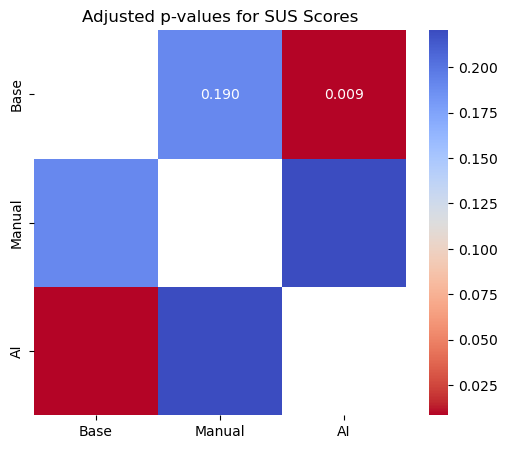

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


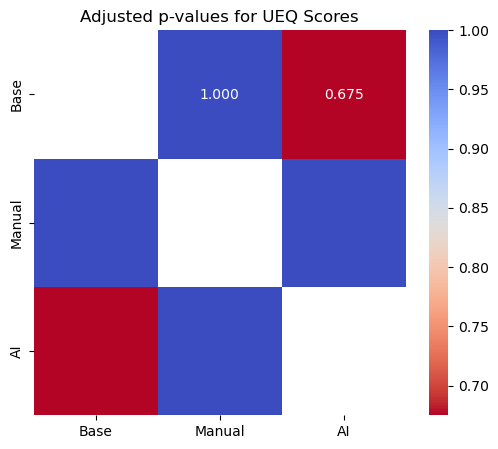

In [33]:
# Heatmaps of Adjusted P-values
import seaborn as sns

def plot_heatmap(result_df, title):
    matrix = pd.DataFrame(index=['Base', 'Manual', 'AI'], columns=['Base', 'Manual', 'AI'])

    for row in result_df.itertuples():
        a, b = row.Comparison.split(' vs ')
        matrix.loc[a, b] = row.adj_p
        matrix.loc[b, a] = row.adj_p

    matrix = matrix.astype(float)
    plt.figure(figsize=(6,5))
    sns.heatmap(matrix, annot=True, cmap='coolwarm_r', fmt='.3f')
    plt.title(title)
    plt.show()

plot_heatmap(sus_df, "Adjusted p-values for SUS Scores")
plot_heatmap(ueq_df, "Adjusted p-values for UEQ Scores")


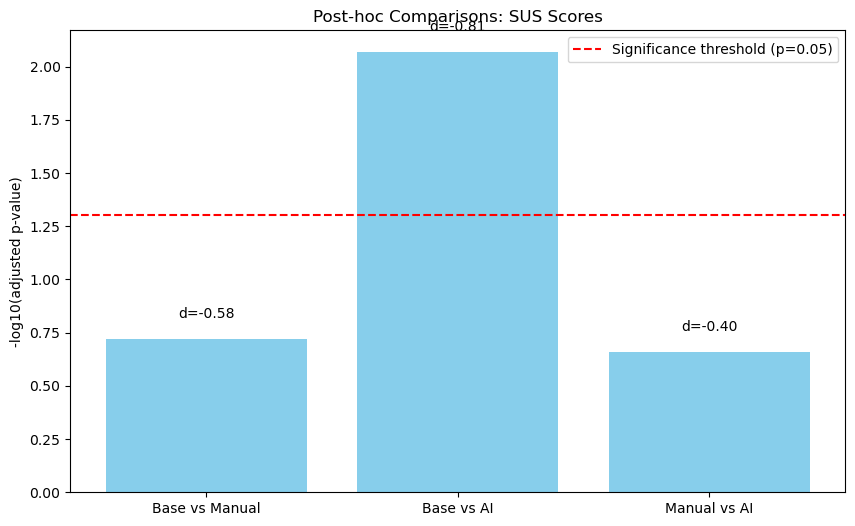

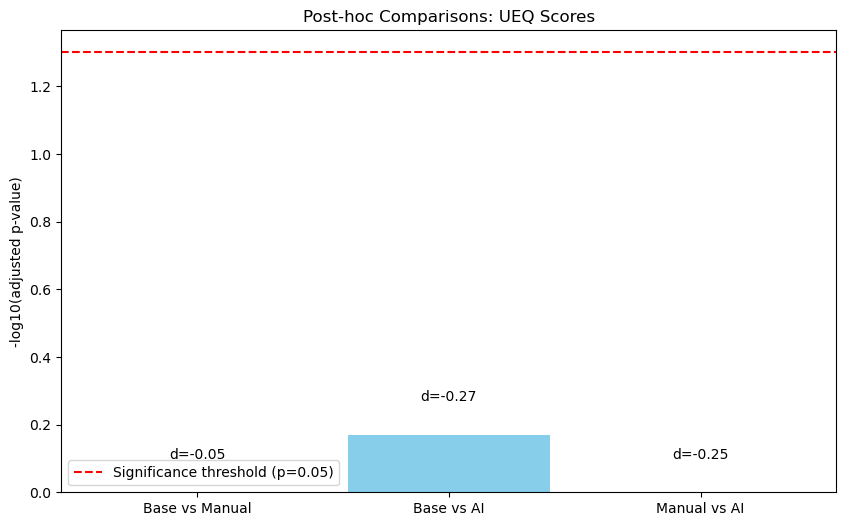

In [34]:
#Visualization: Post-hoc Comparison Results

def plot_posthoc_results(results_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Comparison'], -np.log10(results_df['adj_p']), color='skyblue')
    plt.axhline(-np.log10(0.05), color='red', linestyle='--', label='Significance threshold (p=0.05)')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(f'Post-hoc Comparisons: {title}')
    plt.legend()
    for i, row in results_df.iterrows():
        plt.text(i, -np.log10(row['adj_p'])+0.1, f"d={row['d']:.2f}", ha='center')
    plt.show()

plot_posthoc_results(sus_df, 'SUS Scores')
plot_posthoc_results(ueq_df, 'UEQ Scores')

In [35]:
#Effect Size Calculation (Cohen's d) ????????

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)

print("\nPost-hoc Analysis:")
posthoc_results = []
pairs = [('Base', 'Manual'), ('Base', 'AI'), ('Manual', 'AI')]

for metric in ['SUS', 'UEQ', 'QUIZ']:
    metric_results = []
    
    # Construct column names correctly
    if metric == 'SUS':
        col_suffix = ' LMS_SUS score'
    elif metric == 'UEQ':
        col_suffix = '_LMS_UEQ'
    else:  # QUIZ
        col_suffix = ' LMS_Quiz score'

    for a, b in pairs:
        col_a = a + col_suffix
        col_b = b + col_suffix

        # Drop NA rows for both columns
        valid_idx = df[[col_a, col_b]].dropna().index
        x = df.loc[valid_idx, col_a]
        y = df.loc[valid_idx, col_b]

        # Use Wilcoxon test
        try:
            w, p = stats.wilcoxon(x, y)
        except ValueError:
            w, p = np.nan, np.nan  # Handle cases where test can't run

        d = cohen_d(x, y)
        metric_results.append({'Comparison': f"{a} vs {b}", 'W': w, 'p': p, 'd': d})

    # Bonferroni correction
    pvals = [x['p'] for x in metric_results]
    _, adj_p, _, _ = multipletests(pvals, method='bonferroni')

    for i, res in enumerate(metric_results):
        res['adj_p'] = adj_p[i]
        posthoc_results.append({
            'Metric': metric,
            'Comparison': res['Comparison'],
            'W': res['W'],
            'p': res['adj_p'],
            'Effect Size': res['d']
        })

# Final output
posthoc_df = pd.DataFrame(posthoc_results)
print(posthoc_df.to_markdown(index=False))



Post-hoc Analysis:
| Metric   | Comparison     |     W |          p |   Effect Size |
|:---------|:---------------|------:|-----------:|--------------:|
| SUS      | Base vs Manual |  69.5 | 0.190258   |    -0.764218  |
| SUS      | Base vs AI     |  38.5 | 0.00855446 |    -1.08167   |
| SUS      | Manual vs AI   |  33.5 | 0.220243   |    -0.366275  |
| UEQ      | Base vs Manual | 120   | 1          |    -0.0769836 |
| UEQ      | Base vs AI     |  72.5 | 0.674911   |    -0.336481  |
| UEQ      | Manual vs AI   |  98.5 | 1          |    -0.359865  |
| QUIZ     | Base vs Manual |  54.5 | 0.171405   |    -0.530419  |
| QUIZ     | Base vs AI     |  41.5 | 0.86541    |    -0.223378  |
| QUIZ     | Manual vs AI   |  48   | 0.270998   |     0.349278  |


C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation d

In [25]:
#Effect Size (Cohen's d)

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2)/dof)

print("\nEffect Sizes:")
pairs = [('Base', 'Manual'), ('Base', 'AI'), ('Manual', 'AI')]
for metric in ['SUS', 'UEQ']:
    print(f"\n{metric} Scores:")
    for a, b in pairs:
        col_a = f'{a} LMS_SUS score' if metric == 'SUS' else f'{a}_LMS_UEQ'
        col_b = f'{b} LMS_SUS score' if metric == 'SUS' else f'{b}_LMS_UEQ'
        d = cohen_d(df[col_a], df[col_b])
        print(f"{a} vs {b}: d={abs(d):.2f} ({'small' if abs(d)<0.5 else 'medium' if abs(d)<0.8 else 'large'})")


Effect Sizes:

SUS Scores:
Base vs Manual: d=0.76 (medium)
Base vs AI: d=1.08 (large)
Manual vs AI: d=0.37 (small)

UEQ Scores:
Base vs Manual: d=0.08 (small)
Base vs AI: d=0.34 (small)
Manual vs AI: d=0.36 (small)


In [27]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests

def cohen_d_paired(x, y):
    """
    Correct Cohen's d for paired samples
    Formula: mean(diff) / sd(diff)
    """
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

print("\nPost-hoc Analysis with Correct Effect Sizes:")
posthoc_results = []
pairs = [('Base', 'Manual'), ('Base', 'AI'), ('Manual', 'AI')]

for metric in ['SUS', 'UEQ', 'QUIZ']:
    metric_results = []
    
    # Construct column names
    if metric == 'SUS':
        col_suffix = ' LMS_SUS score'
    elif metric == 'UEQ':
        col_suffix = '_LMS_UEQ'
    else:  # QUIZ
        col_suffix = ' LMS_Quiz score'

    for a, b in pairs:
        col_a = a + col_suffix
        col_b = b + col_suffix

        # Get paired samples
        valid_idx = df[[col_a, col_b]].dropna().index
        x = df.loc[valid_idx, col_a]
        y = df.loc[valid_idx, col_b]

        # Wilcoxon test
        try:
            w, p = stats.wilcoxon(x, y)
        except ValueError:
            w, p = np.nan, np.nan

        # Correct effect size for paired samples
        d = cohen_d_paired(x, y)
        
        metric_results.append({
            'Comparison': f"{a} vs {b}",
            'W': w,
            'p': p,
            'Effect Size': d
        })

    # Bonferroni correction
    pvals = [x['p'] for x in metric_results]
    _, adj_p, _, _ = multipletests(pvals, method='bonferroni')

    for i, res in enumerate(metric_results):
        posthoc_results.append({
            'Metric': metric,
            'Comparison': res['Comparison'],
            'W': res['W'],
            'p': res['p'],
            'adj_p': adj_p[i],
            'Effect Size': abs(res['Effect Size']),
            'Magnitude': 'Negligible' if abs(res['Effect Size']) < 0.2 else 
                         'Small' if abs(res['Effect Size']) < 0.5 else
                         'Medium' if abs(res['Effect Size']) < 0.8 else
                         'Large',
            'Direction': 'Negative' if res['Effect Size'] < 0 else 'Positive'
        })

# Final output
posthoc_df = pd.DataFrame(posthoc_results)
print(posthoc_df.to_markdown(index=False))


Post-hoc Analysis with Correct Effect Sizes:
| Metric   | Comparison     |     W |          p |      adj_p |   Effect Size | Magnitude   | Direction   |
|:---------|:---------------|------:|-----------:|-----------:|--------------:|:------------|:------------|
| SUS      | Base vs Manual |  69.5 | 0.0634193  | 0.190258   |     0.57554   | Medium      | Negative    |
| SUS      | Base vs AI     |  38.5 | 0.00285149 | 0.00855446 |     0.8084    | Large       | Negative    |
| SUS      | Manual vs AI   |  33.5 | 0.0734143  | 0.220243   |     0.403083  | Small       | Negative    |
| UEQ      | Base vs Manual | 120   | 0.848594   | 1          |     0.0508071 | Negligible  | Negative    |
| UEQ      | Base vs AI     |  72.5 | 0.22497    | 0.674911   |     0.274302  | Small       | Negative    |
| UEQ      | Manual vs AI   |  98.5 | 0.808234   | 1          |     0.245433  | Small       | Negative    |
| QUIZ     | Base vs Manual |  54.5 | 0.0571349  | 0.171405   |     0.470325  | Small     

C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation d

In [28]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests

def cohen_d_paired(x, y):
    """Correct Cohen's d for paired samples"""
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

def analyze_lms_data(df):
    print("\nFinal Correct Analysis:")
    posthoc_results = []
    pairs = [('Base', 'Manual'), ('Base', 'AI'), ('Manual', 'AI')]
    
    for metric in ['SUS', 'UEQ', 'QUIZ']:
        # Column name handling
        col_suffix = {
            'SUS': ' LMS_SUS score',
            'UEQ': '_LMS_UEQ',
            'QUIZ': ' LMS_Quiz score'
        }[metric]
        
        for a, b in pairs:
            col_a, col_b = a + col_suffix, b + col_suffix
            valid_idx = df[[col_a, col_b]].dropna().index
            x, y = df.loc[valid_idx, col_a], df.loc[valid_idx, col_b]
            
            # Wilcoxon test
            try:
                w, p = stats.wilcoxon(x, y)
            except ValueError:
                w, p = np.nan, np.nan
                
            # Paired effect size
            d = cohen_d_paired(x, y)
            
            posthoc_results.append({
                'Metric': metric,
                'Comparison': f"{a} vs {b}",
                'W': w,
                'p': p,
                'Effect Size': d,
                'Magnitude': ('Negligible' if abs(d) < 0.2 else
                             'Small' if abs(d) < 0.5 else
                             'Medium' if abs(d) < 0.8 else
                             'Large'),
                'Direction': 'Negative' if d < 0 else 'Positive'
            })
    
    # Bonferroni correction
    pvals = [x['p'] for x in posthoc_results]
    _, adj_p, _, _ = multipletests(pvals, method='bonferroni')
    
    for i, res in enumerate(posthoc_results):
        res['adj_p'] = adj_p[i]
    
    return pd.DataFrame(posthoc_results)

# Run analysis
results_df = analyze_lms_data(df)
print(results_df.to_markdown(index=False))


Final Correct Analysis:
| Metric   | Comparison     |     W |          p |   Effect Size | Magnitude   | Direction   |     adj_p |
|:---------|:---------------|------:|-----------:|--------------:|:------------|:------------|----------:|
| SUS      | Base vs Manual |  69.5 | 0.0634193  |    -0.57554   | Medium      | Negative    | 0.570774  |
| SUS      | Base vs AI     |  38.5 | 0.00285149 |    -0.8084    | Large       | Negative    | 0.0256634 |
| SUS      | Manual vs AI   |  33.5 | 0.0734143  |    -0.403083  | Small       | Negative    | 0.660729  |
| UEQ      | Base vs Manual | 120   | 0.848594   |    -0.0508071 | Negligible  | Negative    | 1         |
| UEQ      | Base vs AI     |  72.5 | 0.22497    |    -0.274302  | Small       | Negative    | 1         |
| UEQ      | Manual vs AI   |  98.5 | 0.808234   |    -0.245433  | Small       | Negative    | 1         |
| QUIZ     | Base vs Manual |  54.5 | 0.0571349  |    -0.470325  | Small       | Negative    | 0.514214  |
| QUIZ     |

C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Program Files\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation d

In [29]:
def calculate_effect_sizes(df):
    results = []
    pairs = [('Base', 'Manual'), ('Base', 'AI'), ('Manual', 'AI')]
    
    for metric in ['SUS', 'UEQ']:
        col_suffix = ' LMS_SUS score' if metric == 'SUS' else '_LMS_UEQ'
        
        for a, b in pairs:
            col_a, col_b = a + col_suffix, b + col_suffix
            valid_idx = df[[col_a, col_b]].dropna().index
            x, y = df.loc[valid_idx, col_a], df.loc[valid_idx, col_b]
            
            # Use Cohen's d for normal data, Cliff's delta for non-normal
            if normality_results.loc[
                (normality_results['Measure'] == metric) & 
                (normality_results['LMS'] == a), 'Normality'].iloc[0] == 'Normal' and \
               normality_results.loc[
                (normality_results['Measure'] == metric) & 
                (normality_results['LMS'] == b), 'Normality'].iloc[0] == 'Normal':
                
                # Cohen's d for paired samples
                diff = x - y
                d = np.mean(diff) / np.std(diff, ddof=1)
                method = "Cohen's d"
            else:
                # Cliff's delta (non-parametric)
                d = (2 * stats.wilcoxon(x, y).statistic / (len(x) * (len(x) - 1))) - 1
                method = "Cliff's delta"
            
            results.append({
                'Metric': metric,
                'Comparison': f"{a} vs {b}",
                'Effect Size': d,
                'Method': method,
                'Magnitude': ('Negligible' if abs(d) < 0.147 else
                             'Small' if abs(d) < 0.33 else
                             'Medium' if abs(d) < 0.474 else
                             'Large')
            })
    
    return pd.DataFrame(results)

effect_sizes = calculate_effect_sizes(df)
print(effect_sizes.to_markdown(index=False))

AttributeError: 'list' object has no attribute 'loc'

In [30]:
#Correlation Analysis- Spearman's ρ between SUS and UEQ

from scipy.stats import spearmanr

print("\nSUS-UEQ Correlations:")
for lms in ['Base', 'Manual', 'AI']:
    sus = f'{lms} LMS_SUS score'
    ueq = f'{lms}_LMS_UEQ'
    rho, p = spearmanr(df[sus], df[ueq])
    print(f"{lms}: ρ={rho:.3f}, p={p:.4f} {'*' if p<0.05 else ''}")


SUS-UEQ Correlations:
Base: ρ=0.373, p=0.0870 
Manual: ρ=0.263, p=0.2365 
AI: ρ=-0.158, p=0.4836 


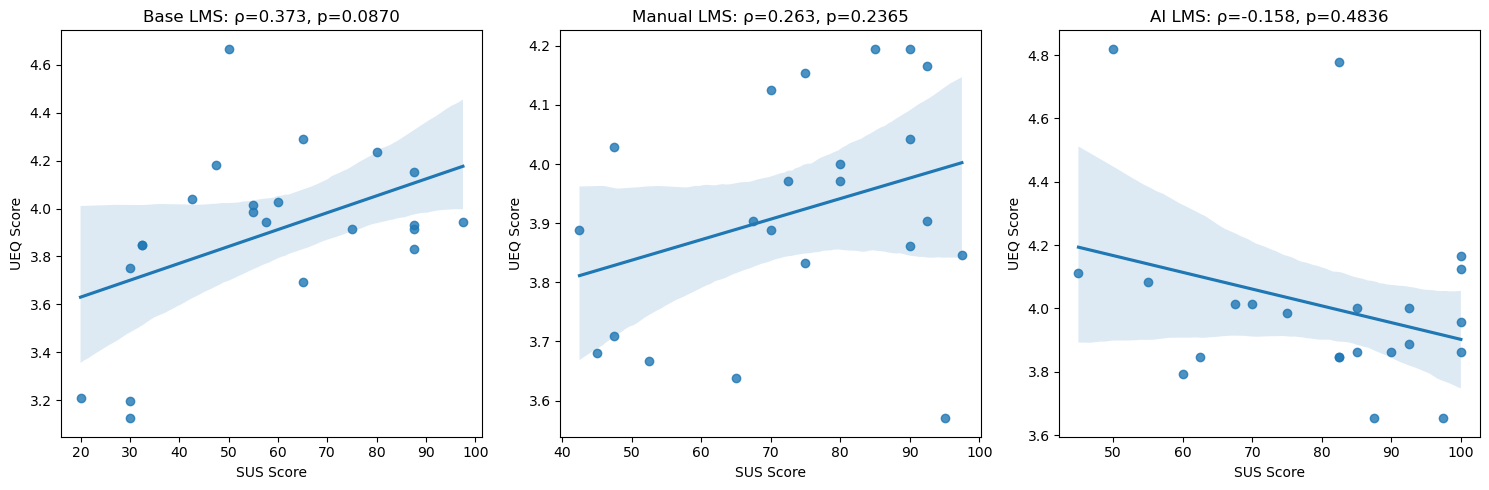

In [36]:
#Visualization: Scatter Plots of SUS vs UEQ

plt.figure(figsize=(15, 5))
for i, lms in enumerate(['Base', 'Manual', 'AI']):
    plt.subplot(1, 3, i+1)
    sns.regplot(x=f'{lms} LMS_SUS score', y=f'{lms}_LMS_UEQ', data=df)
    rho, p = stats.spearmanr(df[f'{lms} LMS_SUS score'], df[f'{lms}_LMS_UEQ'])
    plt.title(f'{lms} LMS: ρ={rho:.3f}, p={p:.4f}')
    plt.xlabel('SUS Score')
    plt.ylabel('UEQ Score')
plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

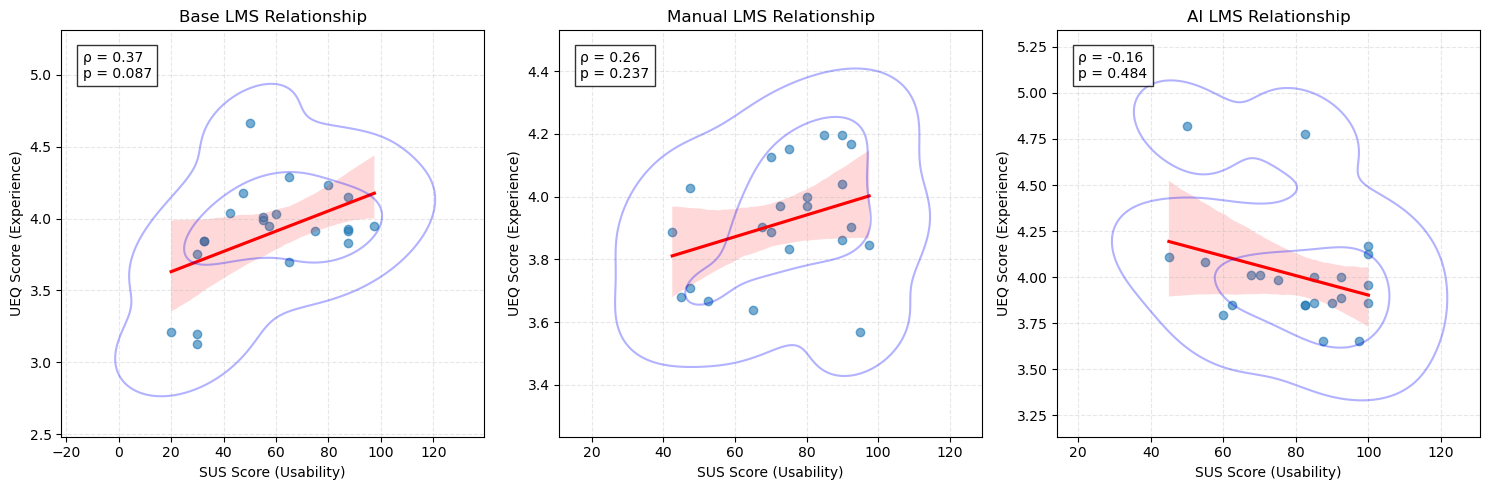

In [37]:
plt.figure(figsize=(15, 5))
for i, lms in enumerate(['Base', 'Manual', 'AI']):
    plt.subplot(1, 3, i+1)
    ax = sns.regplot(x=f'{lms} LMS_SUS score', y=f'{lms}_LMS_UEQ', data=df, 
                    scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    
    # Add correlation annotation
    rho, p = stats.spearmanr(df[f'{lms} LMS_SUS score'], df[f'{lms}_LMS_UEQ'])
    plt.text(0.05, 0.95, f'ρ = {rho:.2f}\np = {p:.3f}', 
             transform=ax.transAxes, ha='left', va='top',
             bbox=dict(facecolor='white', alpha=0.8))
    
    # Add density contours
    sns.kdeplot(x=f'{lms} LMS_SUS score', y=f'{lms}_LMS_UEQ', data=df, 
                levels=3, color='blue', alpha=0.3)
    
    plt.title(f'{lms} LMS Relationship')
    plt.xlabel('SUS Score (Usability)')
    plt.ylabel('UEQ Score (Experience)')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

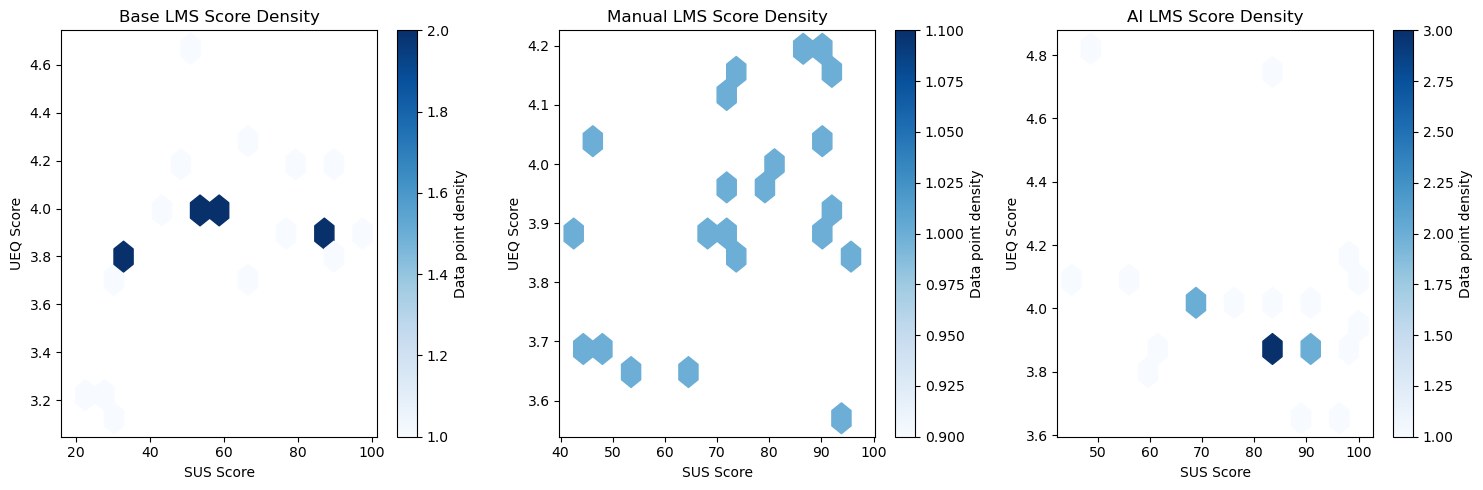

In [38]:
plt.figure(figsize=(15, 5))
for i, lms in enumerate(['Base', 'Manual', 'AI']):
    plt.subplot(1, 3, i+1)
    hb = plt.hexbin(df[f'{lms} LMS_SUS score'], df[f'{lms}_LMS_UEQ'], 
                   gridsize=15, cmap='Blues', mincnt=1)
    plt.colorbar(hb, label='Data point density')
    plt.title(f'{lms} LMS Score Density')
    plt.xlabel('SUS Score')
    plt.ylabel('UEQ Score')
plt.tight_layout()
plt.show()

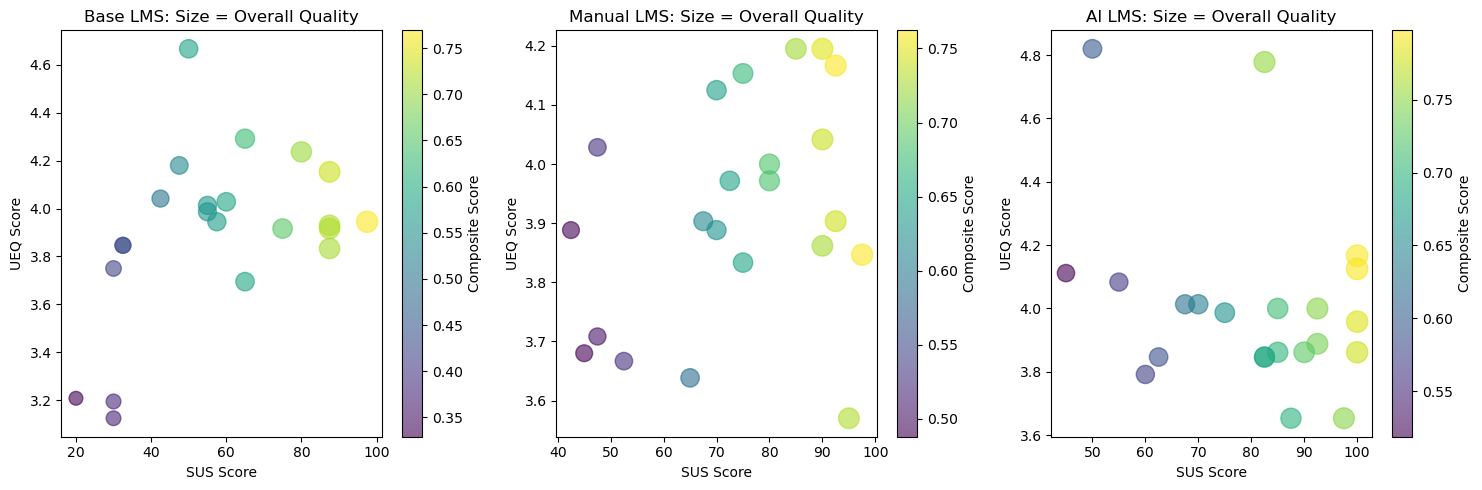

In [39]:
plt.figure(figsize=(15, 5))
for i, lms in enumerate(['Base', 'Manual', 'AI']):
    plt.subplot(1, 3, i+1)
    
    # Calculate composite score (average of normalized SUS and UEQ)
    df['Composite'] = (df[f'{lms} LMS_SUS score']/100 + df[f'{lms}_LMS_UEQ']/7)/2
    
    sc = plt.scatter(df[f'{lms} LMS_SUS score'], df[f'{lms}_LMS_UEQ'],
                    s=df['Composite']*300, alpha=0.6,
                    c=df['Composite'], cmap='viridis')
    
    plt.colorbar(sc, label='Composite Score')
    plt.title(f'{lms} LMS: Size = Overall Quality')
    plt.xlabel('SUS Score')
    plt.ylabel('UEQ Score')
plt.tight_layout()
plt.show()

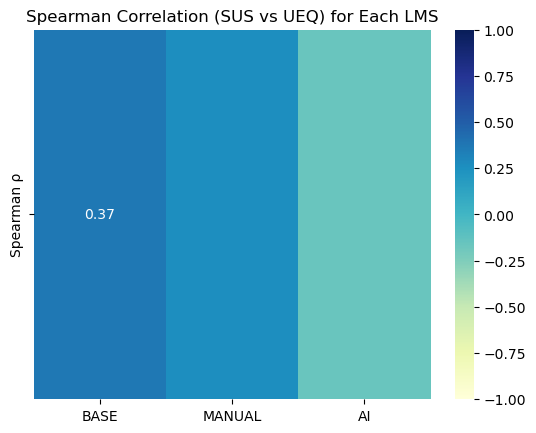

In [40]:
corr_df = pd.DataFrame({
    'BASE': df[[f'Base LMS_SUS score', f'Base_LMS_UEQ']].corr(method='spearman').iloc[0, 1],
    'MANUAL': df[[f'Manual LMS_SUS score', f'Manual_LMS_UEQ']].corr(method='spearman').iloc[0, 1],
    'AI': df[[f'AI LMS_SUS score', f'AI_LMS_UEQ']].corr(method='spearman').iloc[0, 1]
}, index=['Spearman ρ'])

sns.heatmap(corr_df, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, cbar=True)
plt.title("Spearman Correlation (SUS vs UEQ) for Each LMS")
plt.show()


In [31]:
#Subgroup Analysis - Mann-Whitney U Tests

from scipy.stats import mannwhitneyu

print("\nGender Differences:")
for metric in ['SUS', 'UEQ']:
    print(f"\n{metric} Scores:")
    for lms in ['Base', 'Manual', 'AI']:
        col = f'{lms} LMS_SUS score' if metric == 'SUS' else f'{lms}_LMS_UEQ'
        male = df[df['Gender']=='Male'][col].dropna()
        female = df[df['Gender']=='Female'][col].dropna()
        
        u, p = mannwhitneyu(male, female)
        print(f"{lms}: U={u:.1f}, p={p:.4f} {'*' if p<0.05 else ''}")


Gender Differences:

SUS Scores:
Base: U=76.0, p=0.3044 
Manual: U=62.0, p=0.9210 
AI: U=92.5, p=0.0340 *

UEQ Scores:
Base: U=56.0, p=0.8173 
Manual: U=78.5, p=0.2347 
AI: U=59.5, p=1.0000 


In [46]:
#Subgroup Analysis (Mann-Whitney U Tests)

print("\nSubgroup Analysis (Mann-Whitney U Tests):")

# Severity level analysis (combining Low negative/positive due to small sample)
print("\nSeverity Level Differences:")
df['Severity score'] = df['Severity level'].apply(lambda x: 'Low' if 'Low' in x else 'High')
for lms in ['Base', 'Manual', 'AI']:
    low_sus = df[df['Severity score'] == 'Low'][f'{lms}_LMS_SUS']
    high_sus = df[df['Severity score'] == 'High'][f'{lms}_LMS_SUS']
    u_stat, p = stats.mannwhitneyu(low_sus, high_sus)
    print(f"{lms} SUS by Severity: U={u_stat}, p={p:.4f}")
    
    low_ueq = df[df['Severity score'] == 'Low'][f'{lms}_LMS_UEQ']
    high_ueq = df[df['Severity score'] == 'High'][f'{lms}_LMS_UEQ']
    u_stat, p = stats.mannwhitneyu(low_ueq, high_ueq)
    print(f"{lms} UEQ by Severity: U={u_stat}, p={p:.4f}")


Subgroup Analysis (Mann-Whitney U Tests):

Severity Level Differences:


KeyError: 'Severity level'

In [44]:
print("\nSubgroup Analysis:")

# First verify the unique values in categorical columns
print("Unique Gender values:", df['Gender'].unique())
print("Unique ADHD_Level values:", df['ADHD_Level'].unique())

# Define subgroups based on actual data
gender_groups = df['Gender'].unique()
adhd_groups = df['ADHD_Level'].unique()

subgroup_results = []
for lms in ['Base', 'Manual', 'AI']:
    for metric in ['LMS_SUS Score', '_LMS_UEQ', 'LMS_Quiz Score']:
        # Get correct column name based on metric
        if metric == 'UEQ':
            # Calculate mean UEQ score across all dimensions
            ueq_dims = ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']
            ueq_cols = [f'{lms}_LMS_UEQ_{dim}' for dim in ueq_dims]
            df[f'{lms}_LMS_UEQ'] = df[ueq_cols].mean(axis=1)
            col = f'{lms}_LMS_UEQ'
        else:
            col = f'{lms}_LMS_{metric}'
        
        # Gender comparison
        gender_comparisons = []
        for i in range(len(gender_groups)):
            for j in range(i+1, len(gender_groups)):
                group1 = df[df['Gender'] == gender_groups[i]][col].dropna()
                group2 = df[df['Gender'] == gender_groups[j]][col].dropna()
                
                if len(group1) > 0 and len(group2) > 0:
                    u_stat, p_val = stats.mannwhitneyu(group1, group2)
                    gender_comparisons.append({
                        'groups': f"{gender_groups[i]} vs {gender_groups[j]}",
                        'U': u_stat,
                        'p': p_val
                    })
        
        # ADHD Level comparison
        adhd_comparisons = []
        for i in range(len(adhd_groups)):
            for j in range(i+1, len(adhd_groups)):
                group1 = df[df['ADHD_Level'] == adhd_groups[i]][col].dropna()
                group2 = df[df['ADHD_Level'] == adhd_groups[j]][col].dropna()
                
                if len(group1) > 0 and len(group2) > 0:
                    u_stat, p_val = stats.mannwhitneyu(group1, group2)
                    adhd_comparisons.append({
                        'groups': f"{adhd_groups[i]} vs {adhd_groups[j]}",
                        'U': u_stat,
                        'p': p_val
                    })
        
        # Store results
        subgroup_results.append({
            'LMS': lms,
            'Metric': metric,
            'Gender_Comparisons': gender_comparisons,
            'ADHD_Comparisons': adhd_comparisons
        })

# Print results in readable format
print("\nDetailed Subgroup Analysis Results:")
for result in subgroup_results:
    print(f"\n--- {result['LMS']} LMS - {result['Metric']} ---")
    
    print("\nGender Differences:")
    if len(result['Gender_Comparisons']) > 0:
        for comp in result['Gender_Comparisons']:
            sig = "***" if comp['p'] < 0.001 else "**" if comp['p'] < 0.01 else "*" if comp['p'] < 0.05 else ""
            print(f"{comp['groups']}: U={comp['U']:.1f}, p={comp['p']:.4f}{sig}")
    else:
        print("No valid gender comparisons available")
    
    print("\nADHD Level Differences:")
    if len(result['ADHD_Comparisons']) > 0:
        for comp in result['ADHD_Comparisons']:
            sig = "***" if comp['p'] < 0.001 else "**" if comp['p'] < 0.01 else "*" if comp['p'] < 0.05 else ""
            print(f"{comp['groups']}: U={comp['U']:.1f}, p={comp['p']:.4f}{sig}")
    else:
        print("No valid ADHD level comparisons available")

# Create a simplified dataframe for visualization
summary_data = []
for result in subgroup_results:
    for comp in result['Gender_Comparisons']:
        summary_data.append({
            'LMS': result['LMS'],
            'Metric': result['Metric'],
            'Comparison_Type': 'Gender',
            'Groups': comp['groups'],
            'U': comp['U'],
            'p': comp['p']
        })
    for comp in result['ADHD_Comparisons']:
        summary_data.append({
            'LMS': result['LMS'],
            'Metric': result['Metric'],
            'Comparison_Type': 'ADHD',
            'Groups': comp['groups'],
            'U': comp['U'],
            'p': comp['p']
        })

summary_df = pd.DataFrame(summary_data)

# Visualization of significant results
sig_results = summary_df[summary_df['p'] < 0.05]
if not sig_results.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sig_results, x='LMS', y='U', hue='Groups', 
                palette='viridis', dodge=True)
    plt.title('Significant Subgroup Differences (U Statistics)')
    plt.ylabel('Mann-Whitney U Statistic')
    plt.xlabel('LMS Type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo significant subgroup differences found at p < 0.05 level")


Subgroup Analysis:
Unique Gender values: ['Female' 'Male']


KeyError: 'ADHD_Level'

In [42]:
#Categorical Analysis (Chi-square)

from scipy.stats import chi2_contingency

print("\nSUS Category by Gender:")
sus_bins = [0, 51, 68, 80.3, 100]
labels = ['Unacceptable', 'Marginal', 'Acceptable','Excellent']
df['SUS_Category'] = pd.cut(df['Manual LMS_SUS score'], bins=sus_bins, labels=labels)

contingency = pd.crosstab(df['Gender'], df['SUS_Category'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"χ²({dof})={chi2:.2f}, p={p:.4f}")
print(contingency)


SUS Category by Gender:
χ²(3)=4.50, p=0.2124
SUS_Category  Unacceptable  Marginal  Acceptable  Excellent
Gender                                                     
Female                   1         3           3          3
Male                     3         0           4          5


In [9]:
import pandas as pd
from scipy import stats
import numpy as np

# Subgroup Analysis (Mann-Whitney U Tests)
print("\nSubgroup Analysis (Mann-Whitney U Tests):")

# Severity level analysis (combining Low negative/positive)
print("\nSeverity Level Differences:")
df['Severity_group'] = df['ADHD Level'].apply(lambda x: 'Low' if 'Low' in x else 'High')

for lms in ['Base', 'Manual', 'AI']:
    # SUS Scores analysis - using exact column names from your dataset
    low_sus = df[df['Severity_group'] == 'Low'][f'{lms} LMS_SUS score'].dropna()
    high_sus = df[df['Severity_group'] == 'High'][f'{lms} LMS_SUS score'].dropna()
    
    print(f"\n{lms} LMS SUS Scores:")
    print(f"Low severity (n={len(low_sus)}): Median = {np.median(low_sus):.1f}")
    print(f"High severity (n={len(high_sus)}): Median = {np.median(high_sus):.1f}")
    
    if len(low_sus) > 0 and len(high_sus) > 0:
        u_stat, p = stats.mannwhitneyu(low_sus, high_sus)
        print(f"Mann-Whitney U = {u_stat}, p = {p:.4f}")
        
        # Corrected effect size calculation (rank-biserial correlation)
        r = 1 - (2 * u_stat) / (len(low_sus) * len(high_sus))  # Fixed parentheses and calculation
        print(f"Effect size (r) = {abs(r):.2f} ({'small' if abs(r) < 0.3 else 'medium' if abs(r) < 0.5 else 'large'})")
    
    # UEQ Scores analysis - using exact column names from your dataset
    low_ueq = df[df['Severity_group'] == 'Low'][f'{lms}_LMS_UEQ'].dropna()
    high_ueq = df[df['Severity_group'] == 'High'][f'{lms}_LMS_UEQ'].dropna()
    
    print(f"\n{lms} LMS UEQ Scores:")
    print(f"Low severity (n={len(low_ueq)}): Median = {np.median(low_ueq):.1f}")
    print(f"High severity (n={len(high_ueq)}): Median = {np.median(high_ueq):.1f}")
    
    if len(low_ueq) > 0 and len(high_ueq) > 0:
        u_stat, p = stats.mannwhitneyu(low_ueq, high_ueq)
        print(f"Mann-Whitney U = {u_stat}, p = {p:.4f}")
        
        # Corrected effect size calculation (rank-biserial correlation)
        r = 1 - (2 * u_stat) / (len(low_ueq) * len(high_ueq))  # Fixed parentheses and calculation
        print(f"Effect size (r) = {abs(r):.2f} ({'small' if abs(r) < 0.3 else 'medium' if abs(r) < 0.5 else 'large'})")
    
    print("\n" + "="*50)


Subgroup Analysis (Mann-Whitney U Tests):

Severity Level Differences:

Base LMS SUS Scores:
Low severity (n=17): Median = 57.5
High severity (n=5): Median = 32.5
Mann-Whitney U = 49.5, p = 0.6089
Effect size (r) = 0.16 (small)

Base LMS UEQ Scores:
Low severity (n=17): Median = 3.9
High severity (n=5): Median = 3.8
Mann-Whitney U = 53.5, p = 0.4103
Effect size (r) = 0.26 (small)


Manual LMS SUS Scores:
Low severity (n=17): Median = 70.0
High severity (n=5): Median = 90.0
Mann-Whitney U = 17.5, p = 0.0543
Effect size (r) = 0.59 (large)

Manual LMS UEQ Scores:
Low severity (n=17): Median = 3.9
High severity (n=5): Median = 4.2
Mann-Whitney U = 22.5, p = 0.1261
Effect size (r) = 0.47 (medium)


AI LMS SUS Scores:
Low severity (n=17): Median = 82.5
High severity (n=5): Median = 92.5
Mann-Whitney U = 22.5, p = 0.1249
Effect size (r) = 0.47 (medium)

AI LMS UEQ Scores:
Low severity (n=17): Median = 4.0
High severity (n=5): Median = 4.0
Mann-Whitney U = 45.5, p = 0.8442
Effect size (r) = 0

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/ADHD LMS Evaluation dataset.csv')

# Create UEQ total scores for each LMS
df["Base LMS_UEQ Total"] = df[
    ["Base LMS_UEQ_Attractiveness", "Base LMS_UEQ_Perspicuity", "Base LMS_UEQ_Novelty",
     "Base LMS_UEQ_Stimulation", "Base LMS_UEQ_Dependability", "Base LMS_UEQ_Efficiency"]
].sum(axis=1)

df["Manual LMS_UEQ Total"] = df[
    ["Manual LMS_UEQ_Attractiveness", "Manual LMS_UEQ_Perspicuity", "Manual LMS_UEQ_Novelty",
     "Manual LMS_UEQ_Stimulation", "Manual LMS_UEQ_Dependability", "Manual LMS_UEQ_Efficiency"]
].sum(axis=1)

df["AI LMS_UEQ Total"] = df[
    ["AI LMS_UEQ_Attractiveness", "AI LMS_UEQ_Perspicuity", "AI LMS_UEQ_Novelty",
     "AI LMS_UEQ_Stimulation", "AI LMS_UEQ_Dependability", "AI LMS_UEQ_Efficiency"]
].sum(axis=1)

# Summarize totals per ADHD Level
summary_table = df.groupby("ADHD Level").agg({
    "Base LMS_Quiz score": "sum",
    "Base LMS_SUS score": "sum",
    "Base LMS_UEQ Total": "sum",
    "Manual LMS_Quiz score": "sum",
    "Manual LMS_SUS score": "sum",
    "Manual LMS_UEQ Total": "sum",
    "AI LMS_Quiz score": "sum",
    "AI LMS_SUS score": "sum",
    "AI LMS_UEQ Total": "sum"
}).reset_index()

summary_table.columns = [
    "ADHD Level",
    "Base Quiz Total", "Base SUS Total", "Base UEQ Total",
    "Manual Quiz Total", "Manual SUS Total", "Manual UEQ Total",
    "AI Quiz Total", "AI SUS Total", "AI UEQ Total"
]

# Count participants in each ADHD Level
adhd_counts = df["ADHD Level"].value_counts().to_dict()
summary_table["Participant Count"] = summary_table["ADHD Level"].map(adhd_counts)

# Define desired column order
score_columns = [
    "Base SUS Total", "Manual SUS Total", "AI SUS Total",
    "Base UEQ Total", "Manual UEQ Total", "AI UEQ Total",
    "Base Quiz Total", "Manual Quiz Total", "AI Quiz Total"
]

# Create average table
average_table = summary_table.copy()
for col in score_columns:
    average_table[col] = average_table[col] / average_table["Participant Count"]

# Rename columns to indicate averages
average_table.rename(columns={col: col.replace("Total", "Average") for col in score_columns}, inplace=True)

# Rearranged column order
average_table = average_table[["ADHD Level"] + [col.replace("Total", "Average") for col in score_columns]]

# Display the result
average_table


,ADHD Level,Base SUS Average,Manual SUS Average,AI SUS Average,Base UEQ Average,Manual UEQ Average,AI UEQ Average,Base Quiz Average,Manual Quiz Average,AI Quiz Average
0,High negative,52.500000,87.000000,91.500000,22.850,24.118000,23.782000,5.000000,6.200000,5.200000
1,Low negative,77.500000,70.000000,73.750000,23.670,23.795000,23.915000,6.000000,7.500000,7.500000
2,Low positive,57.166667,69.833333,77.166667,23.528,23.282667,24.151333,5.466667,6.533333,5.866667


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/ADHD LMS Evaluation dataset.csv')

# Create UEQ total scores for each LMS
df["Base LMS_UEQ Total"] = df[
    ["Base LMS_UEQ_Attractiveness", "Base LMS_UEQ_Perspicuity", "Base LMS_UEQ_Novelty",
     "Base LMS_UEQ_Stimulation", "Base LMS_UEQ_Dependability", "Base LMS_UEQ_Efficiency"]
].sum(axis=1)

df["Manual LMS_UEQ Total"] = df[
    ["Manual LMS_UEQ_Attractiveness", "Manual LMS_UEQ_Perspicuity", "Manual LMS_UEQ_Novelty",
     "Manual LMS_UEQ_Stimulation", "Manual LMS_UEQ_Dependability", "Manual LMS_UEQ_Efficiency"]
].sum(axis=1)

df["AI LMS_UEQ Total"] = df[
    ["AI LMS_UEQ_Attractiveness", "AI LMS_UEQ_Perspicuity", "AI LMS_UEQ_Novelty",
     "AI LMS_UEQ_Stimulation", "AI LMS_UEQ_Dependability", "AI LMS_UEQ_Efficiency"]
].sum(axis=1)

# Summarize totals per ADHD Level
summary_table = df.groupby("ADHD Level").agg({
    "Base LMS_Quiz score": "sum",
    "Base LMS_SUS score": "sum",
    "Base LMS_UEQ Total": "sum",
    "Manual LMS_Quiz score": "sum",
    "Manual LMS_SUS score": "sum",
    "Manual LMS_UEQ Total": "sum",
    "AI LMS_Quiz score": "sum",
    "AI LMS_SUS score": "sum",
    "AI LMS_UEQ Total": "sum"
}).reset_index()

summary_table.columns = [
    "ADHD Level",
    "Base Quiz Total", "Base SUS Total", "Base UEQ Total",
    "Manual Quiz Total", "Manual SUS Total", "Manual UEQ Total",
    "AI Quiz Total", "AI SUS Total", "AI UEQ Total"
]

# Count participants in each ADHD Level
adhd_counts = df["ADHD Level"].value_counts().to_dict()
summary_table["Participant Count"] = summary_table["ADHD Level"].map(adhd_counts)

# Define desired column order
score_columns = [
    "Base SUS Total", "Manual SUS Total", "AI SUS Total",
    "Base UEQ Total", "Manual UEQ Total", "AI UEQ Total",
    "Base Quiz Total", "Manual Quiz Total", "AI Quiz Total"
]

# Create average table
average_table = summary_table.copy()
for col in score_columns:
    average_table[col] = average_table[col] / average_table["Participant Count"]

# Rename columns to indicate averages
average_table.rename(columns={col: col.replace("Total", "Average") for col in score_columns}, inplace=True)

# Rearranged column order
average_table = average_table[["ADHD Level"] + [col.replace("Total", "Average") for col in score_columns]]
average_table = average_table.round(2)

# Display the result
average_table


,ADHD Level,Base SUS Average,Manual SUS Average,AI SUS Average,Base UEQ Average,Manual UEQ Average,AI UEQ Average,Base Quiz Average,Manual Quiz Average,AI Quiz Average
0,High negative,52.50,87.00,91.50,22.85,24.12,23.78,5.00,6.20,5.20
1,Low negative,77.50,70.00,73.75,23.67,23.80,23.92,6.00,7.50,7.50
2,Low positive,57.17,69.83,77.17,23.53,23.28,24.15,5.47,6.53,5.87


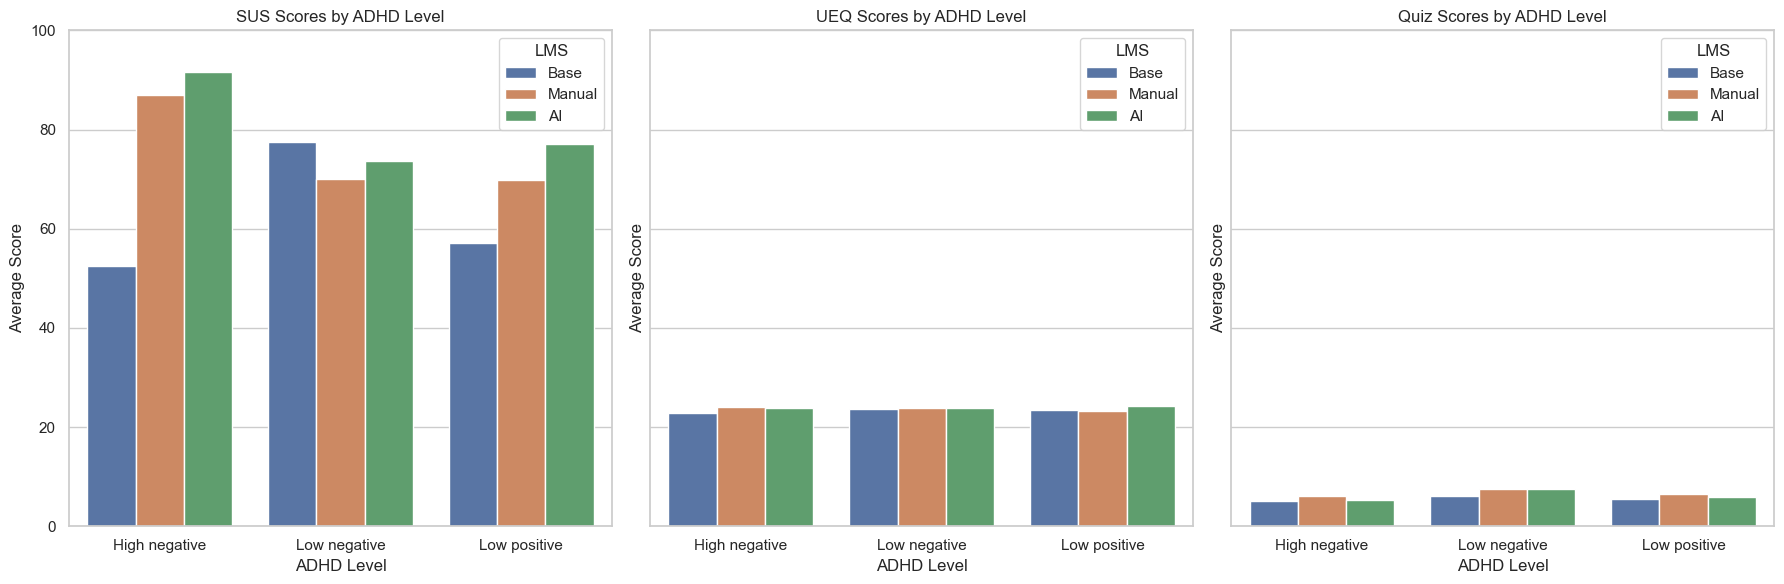

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Melt the table for plotting
melted = average_table.melt(id_vars="ADHD Level", var_name="Metric", value_name="Average Score")

# Extract LMS and Metric type
melted["LMS"] = melted["Metric"].str.extract(r'(Base|Manual|AI)')
melted["Type"] = melted["Metric"].str.extract(r'(SUS|UEQ|Quiz)')

# Set up a figure with 3 subplots (one for each type)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each type separately
for ax, metric_type in zip(axes, ["SUS", "UEQ", "Quiz"]):
    subset = melted[melted["Type"] == metric_type]
    sns.barplot(data=subset, x="ADHD Level", y="Average Score", hue="LMS", ax=ax)
    ax.set_title(f"{metric_type} Scores by ADHD Level")
    ax.set_ylim(0, 100)  # Assuming scores are out of 100
    ax.legend(title="LMS")

plt.tight_layout()
plt.show()


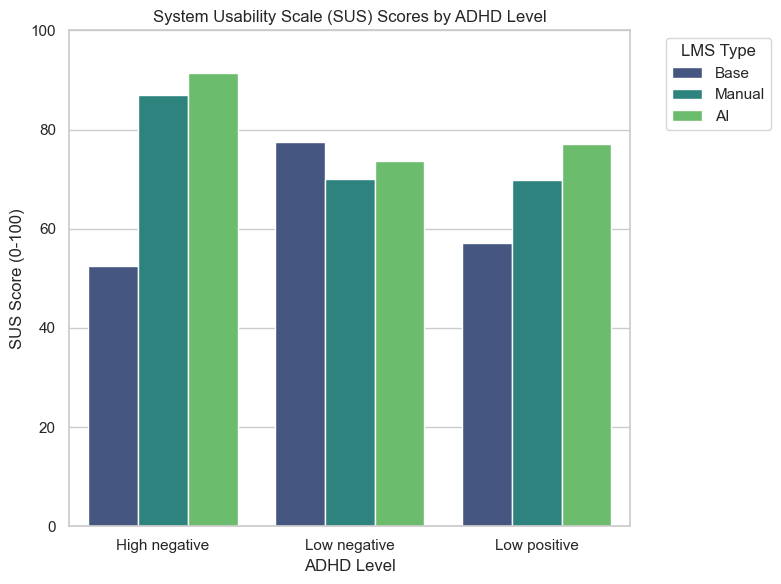

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(data=melted[melted["Type"] == "SUS"], 
            x="ADHD Level", 
            y="Average Score", 
            hue="LMS",
            palette="viridis")
plt.title("System Usability Scale (SUS) Scores by ADHD Level")
plt.ylim(0, 100)  # SUS scale 0-100
plt.ylabel("SUS Score (0-100)")
plt.legend(title="LMS Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

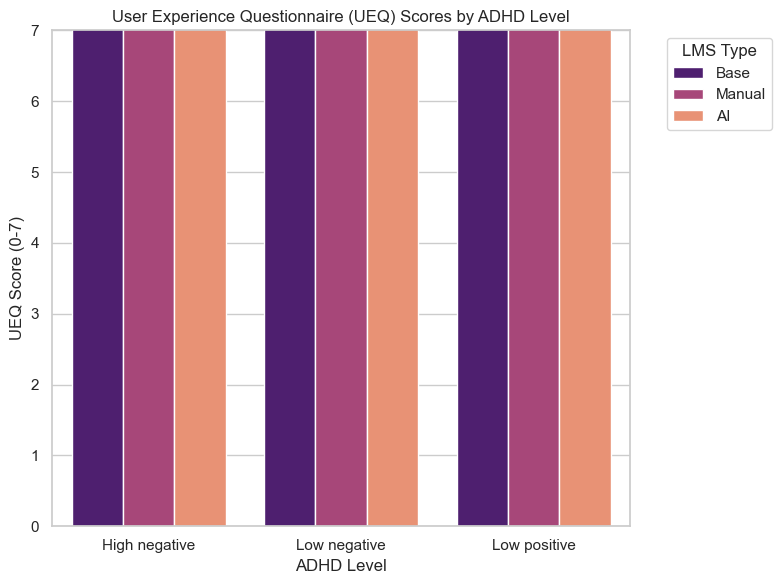

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(data=melted[melted["Type"] == "UEQ"], 
            x="ADHD Level", 
            y="Average Score", 
            hue="LMS",
            palette="magma")
plt.title("User Experience Questionnaire (UEQ) Scores by ADHD Level")
plt.ylim(0, 7)  # UEQ scale 1-7
plt.ylabel("UEQ Score (0-7)")
plt.legend(title="LMS Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

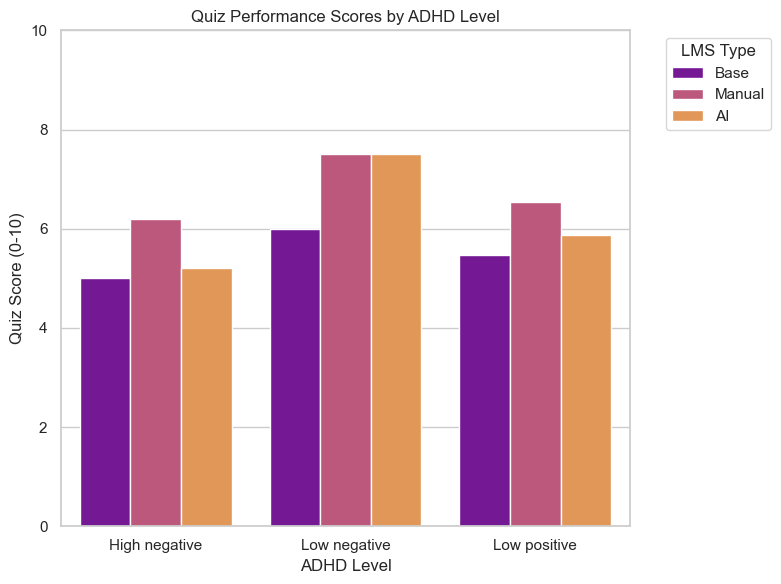

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=melted[melted["Type"] == "Quiz"], 
            x="ADHD Level", 
            y="Average Score", 
            hue="LMS",
            palette="plasma")
plt.title("Quiz Performance Scores by ADHD Level")
plt.ylim(0, 10)  # Assuming quiz scores out of 10
plt.ylabel("Quiz Score (0-10)")
plt.legend(title="LMS Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clean plot style
sns.set(style="whitegrid", palette="Set2")

# Melt to long format
melted = average_table.melt(id_vars="ADHD Level", var_name="Metric", value_name="Average Score")
melted["LMS"] = melted["Metric"].str.extract(r'(Base|Manual|AI)')
melted["Type"] = melted["Metric"].str.extract(r'(SUS|UEQ|Quiz)')

# Plot for each score type
for metric_type in ["SUS", "UEQ", "Quiz"]:
    plt.figure(figsize=(8, 6))
    
    subset = melted[melted["Type"] == metric_type]
    
    ax = sns.barplot(
        data=subset,
        x="LMS",
        y="Average Score",
        hue="ADHD Level",
        ci=None
    )
    
    ax.set_title(f"{metric_type} Average Scores by Prototype", fontsize=14, weight='bold')
    ax.set_xlabel("Prototype (LMS)", fontsize=12)
    ax.set_ylabel("Average Score", fontsize=12)
    ax.legend(title="ADHD Level")
    
    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3)

    plt.tight_layout()
    plt.show()


SyntaxError: invalid non-printable character U+00A0 (3671790945.py, line 37)

C:\Users\Omic PC\AppData\Local\Temp\ipykernel_21384\664498880.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


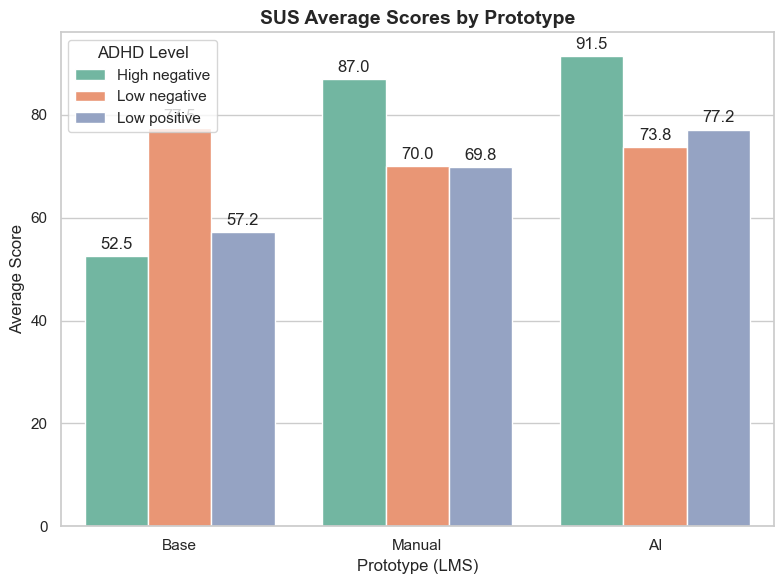

C:\Users\Omic PC\AppData\Local\Temp\ipykernel_21384\664498880.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


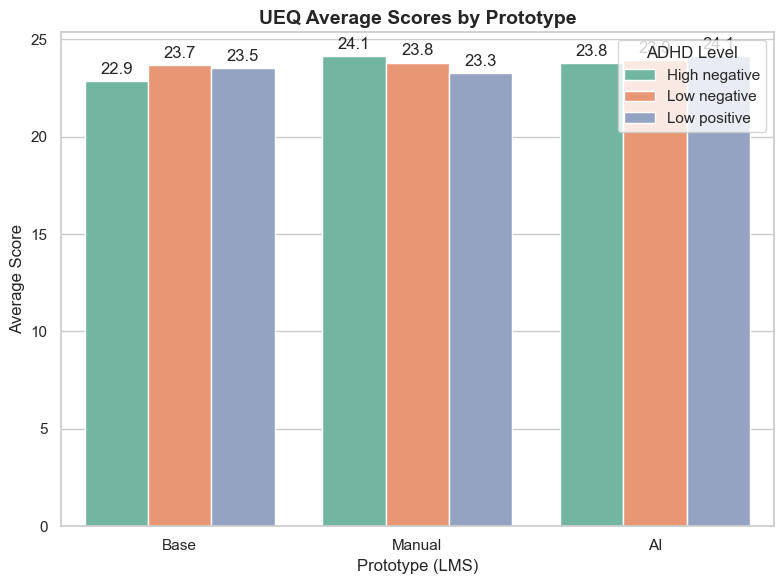

C:\Users\Omic PC\AppData\Local\Temp\ipykernel_21384\664498880.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


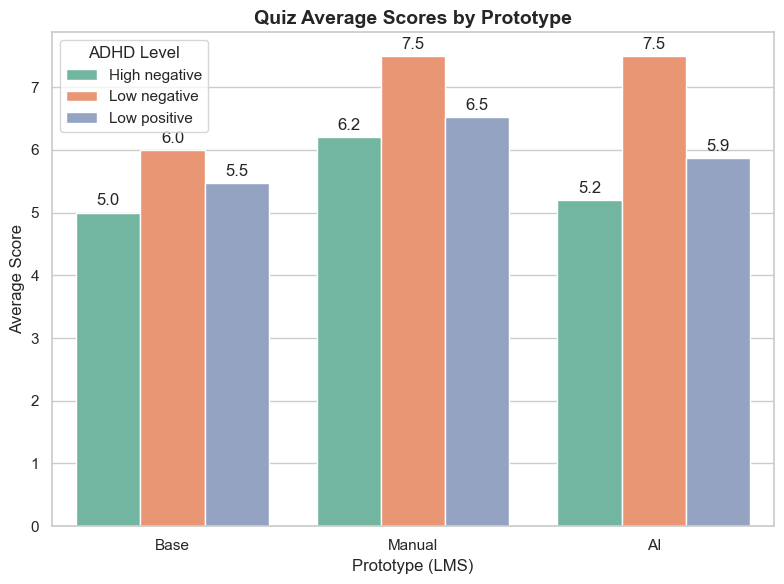

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clean plot style
sns.set(style="whitegrid", palette="Set2")

# Melt to long format
melted = average_table.melt(id_vars="ADHD Level", var_name="Metric", value_name="Average Score")
melted["LMS"] = melted["Metric"].str.extract(r'(Base|Manual|AI)')
melted["Type"] = melted["Metric"].str.extract(r'(SUS|UEQ|Quiz)')

# Plot for each score type
for metric_type in ["SUS", "UEQ", "Quiz"]:
    plt.figure(figsize=(8, 6))
    
    subset = melted[melted["Type"] == metric_type]
    
    ax = sns.barplot(
        data=subset,
        x="LMS",
        y="Average Score",
        hue="ADHD Level",
        ci=None
    )
    
    ax.set_title(f"{metric_type} Average Scores by Prototype", fontsize=14, weight='bold')
    ax.set_xlabel("Prototype (LMS)", fontsize=12)
    ax.set_ylabel("Average Score", fontsize=12)
    ax.legend(title="ADHD Level")
    
    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3)

    plt.tight_layout()
    plt.show()